# Documentation and Functions

In [84]:
# # Check required packages and dependencies:
# !pip freeze > requirements.txt

In [85]:
import os

# Measure Package 0: Baseline
menu_mp = 0
input_mp = 'baseline'

# Get the current working directory of the project
project_root = os.path.abspath(os.getcwd())
print(f"Project root directory: {project_root}")

# Relative path to the file from the project root
relative_path = r"tare_model_functions_v1_5_1.ipynb"

# Construct the absolute path to the file
file_path = os.path.join(project_root, relative_path)
print(f"File path: {file_path}")

# Run the notebook and import variables
if os.path.exists(relative_path):
    get_ipython().run_line_magic('run', f'-i "{relative_path}"')
    print("Loaded All TARE Model Functions")
else:
    print(f"File not found: {relative_path}")

Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_functions_v1_5_1.ipynb
Loaded All TARE Model Functions


In [86]:
from datetime import datetime

# Get the current datetime
# Start the timer
start_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from tabulate import tabulate

# Set the font for Matplotlib
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

# Set the font for Seaborn
sns.set(font='sans-serif', style='darkgrid')

In [99]:
pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [89]:
# Format the name of the exported results file using the location ID
from datetime import datetime
result_export_time = datetime.now()
results_export_formatted_date = result_export_time.strftime("%Y-%m-%d_%H-%M")

In [90]:
# Select whether to begin new run or visualize existing model outputs
while True:
    try:
        start_new_model_run = str(input("""
Would you like to begin a new simulation or visualize output results from a previous model run? Please enter one of the following:
Y. I'd like to start a new model run.
N. I'd like to visualize output results from a previous model run.""")).upper()

        if start_new_model_run == 'Y':
            model_run_date_time = results_export_formatted_date           
            print(f"Project root directory: {project_root}")

            # Relative path to the file from the project root
            relative_path = r"tare_model_run_simulation_v1_5_1.ipynb"

            # Construct the absolute path to the file
            file_path = os.path.join(project_root, relative_path)
            print(f"File path: {file_path}")

            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(project_root, r"output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")
            save_figure_directory = str(output_folder_path)

            # Run the notebook and import variables
            if os.path.exists(relative_path):
                get_ipython().run_line_magic('run', f'-i "{relative_path}"')
            else:
                print(f"File not found: {relative_path}")

            break  # Exit the loop if input is 'Y'
            
        elif start_new_model_run == 'N':
            # Enter the date time of the model run in the following format: YYYY-MM-DD_HH-MM
            model_run_date_time = str(input("Enter the date time of the model run in the following format YYYY-MM-DD_HH-MM: "))
            print(f"Project root directory: {project_root}")
            
            # Storing Result Outputs in output_results folder
            relative_path = r"output_results"
            output_folder_path = os.path.join(project_root, relative_path)
            print(f"Result outputs will be exported here: {output_folder_path}")

            save_figure_directory = str(output_folder_path)
            
            break  # Exit the loop if input is 'N'
        
        else:
            print("Invalid input. Please enter 'Y' or 'N'.")
    
    except Exception as e:
        print("Invalid input. Please try again.")

Project root directory: c:\Users\14128\Research\cmu-tare-model
Result outputs will be exported here: c:\Users\14128\Research\cmu-tare-model\output_results


# Baseline Scenario

### Convert Results Output CSVs to Dataframes

In [91]:
# Baseline
# load_scenario_data(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'baseline_summary'

df_outputs_baseline_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})
df_outputs_baseline_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})
df_outputs_baseline_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})
df_outputs_baseline_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})
df_outputs_baseline_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={19:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Whole-Home data for policy_scenario 'baseline_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Heating data for policy_scenario 'baseline_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Water Heating data for policy_scenario 'baseline_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Clothes Drying data for policy_scenario 'baseline_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline_summary
Loaded Cooking data for policy_scenario 'baseline_summary' 



In [92]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_baseline_heating['end_use'] = 'heating'
df_outputs_baseline_heating['base_fuel'] = df_outputs_baseline_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_baseline_waterHeating['end_use'] = 'waterHeating'
df_outputs_baseline_waterHeating['base_fuel'] = df_outputs_baseline_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_baseline_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_baseline_clothesDrying['base_fuel'] = df_outputs_baseline_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_baseline_cooking['end_use'] = 'cooking'
df_outputs_baseline_cooking['base_fuel'] = df_outputs_baseline_home['base_cooking_fuel']

# Energy Efficiency Retrofit Scenarios

In [93]:
print("""
----------------------------------------------------------------------------------------------
Scenarios for Basic, Moderate, and Advanced Retrofit
----------------------------------------------------------------------------------------------
Basic Retrofit Scenarios
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic Pre-IRA: Basic Retrofit (MP8), Pre-IRA Costs, Current Electricity Grid
    - Basic IRA-Reference: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic IRA-High: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

Moderate Retrofit Scenarios
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate Pre-IRA: Moderate Retrofit (MP9), Pre-IRA Costs, Current Electricity Grid
    - Moderate IRA-Reference: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate IRA-High: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
    
Advanced Retrofit Scenarios
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced Pre-IRA: Advanced Retrofit (MP10), Pre-IRA Costs, Current Electricity Grid
    - Advanced IRA-Reference: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced IRA-High: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid

Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
""", "\n")


----------------------------------------------------------------------------------------------
Scenarios for Basic, Moderate, and Advanced Retrofit
----------------------------------------------------------------------------------------------
Basic Retrofit Scenarios
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic Pre-IRA: Basic Retrofit (MP8), Pre-IRA Costs, Current Electricity Grid
    - Basic IRA-Reference: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic IRA-High: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

Moderate Retrofit Scenarios
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate Pre-IRA: Moderate Retrofit (MP9), Pre-IRA Costs, Current Electricity Grid
    - Moderate IRA-Reference: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate IRA-High: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
  

-------------------------------------------------------------------------------------------------------
# BASIC RETROFIT MEASURE PACKAGE 8
-------------------------------------------------------------------------------------------------------
## - BASIC Pre-IRA Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 8
    - AEO2023 No Inflation Reduction Act
    - Cambium 2021 MidCase

## - BASIC IRA-Reference Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 8
    - AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
    - Cambium 2022 and 2023 MidCase

## Model Run Calculations

In [94]:
# print("""
# ----------------------------------------------------------------------------------------------
# Basic Retrofit Scenarios
# ----------------------------------------------------------------------------------------------
# - The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
#     - Basic Pre-IRA: Basic Retrofit (MP8), Pre-IRA Costs, Current Electricity Grid
#     - Basic IRA-Reference: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
#     - Basic IRA-High: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid
# ----------------------------------------------------------------------------------------------
# Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
# The same filters are applied.
# ----------------------------------------------------------------------------------------------
# """, "\n")

## Convert Results Output CSVs to Dataframes

In [95]:
# MP8: 'retrofit_basic'
# load_scenario_data(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_basic_summary'
menu_mp = 8

df_outputs_basic_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_basic_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_basic_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_basic_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_basic_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Whole-Home data for policy_scenario 'retrofit_basic_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Heating data for policy_scenario 'retrofit_basic_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Water Heating data for policy_scenario 'retrofit_basic_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Clothes Drying data for policy_scenario 'retrofit_basic_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic_summary
Loaded Cooking data for policy_scenario 'retrofit_basic_summary' 



In [96]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_basic_heating['end_use'] = 'heating'
df_outputs_basic_heating['base_fuel'] = df_outputs_basic_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_basic_waterHeating['end_use'] = 'waterHeating'
df_outputs_basic_waterHeating['base_fuel'] = df_outputs_basic_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_basic_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_basic_clothesDrying['base_fuel'] = df_outputs_basic_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_basic_cooking['end_use'] = 'cooking'
df_outputs_basic_cooking['base_fuel'] = df_outputs_basic_home['base_cooking_fuel']

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Basic Retrofit (MP8)

In [100]:
df_outputs_basic_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,reeds_balancing_area,state,city,county,puma,county_and_puma,weather_file_city,Longitude,Latitude,building_type,income,federal_poverty_level,occupancy,tenure,vacancy_status,base_heating_fuel,heating_type,hvac_cooling_type,vintage,base_heating_efficiency,base_electricity_heating_consumption,base_fuelOil_heating_consumption,base_naturalGas_heating_consumption,base_propane_heating_consumption,base_waterHeating_fuel,waterHeating_type,base_electricity_waterHeating_consumption,base_fuelOil_waterHeating_consumption,base_naturalGas_waterHeating_consumption,base_propane_waterHeating_consumption,base_clothesDrying_fuel,base_electricity_clothesDrying_consumption,base_naturalGas_clothesDrying_consumption,base_propane_clothesDrying_consumption,base_cooking_fuel,base_electricity_cooking_consumption,base_naturalGas_cooking_consumption,base_propane_cooking_consumption,baseline_heating_consumption,baseline_waterHeating_consumption,baseline_clothesDrying_consumption,baseline_cooking_consumption,baseline_2024_heating_consumption,baseline_2025_heating_consumption,baseline_2026_heating_consumption,baseline_2027_heating_consumption,baseline_2028_heating_consumption,baseline_2029_heating_consumption,baseline_2030_heating_consumption,baseline_2031_heating_consumption,baseline_2032_heating_consumption,baseline_2033_heating_consumption,baseline_2034_heating_consumption,baseline_2035_heating_consumption,baseline_2036_heating_consumption,baseline_2037_heating_consumption,baseline_2038_heating_consumption,baseline_2024_waterHeating_consumption,baseline_2025_waterHeating_consumption,baseline_2026_waterHeating_consumption,baseline_2027_waterHeating_consumption,baseline_2028_waterHeating_consumption,baseline_2029_waterHeating_consumption,baseline_2030_waterHeating_consumption,baseline_2031_waterHeating_consumption,baseline_2032_waterHeating_consumption,baseline_2033_waterHeating_consumption,baseline_2034_waterHeating_consumption,baseline_2035_waterHeating_consumption,baseline_2024_clothesDrying_consumption,baseline_2025_clothesDrying_consumption,baseline_2026_clothesDrying_consumption,baseline_2027_clothesDrying_consumption,baseline_2028_clothesDrying_consumption,baseline_2029_clothesDrying_consumption,baseline_2030_clothesDrying_consumption,baseline_2031_clothesDrying_consumption,baseline_2032_clothesDrying_consumption,baseline_2033_clothesDrying_consumption,baseline_2034_clothesDrying_consumption,baseline_2035_clothesDrying_consumption,baseline_2036_clothesDrying_consumption,baseline_2024_cooking_consumption,baseline_2025_cooking_consumption,baseline_2026_cooking_consumption,baseline_2027_cooking_consumption,baseline_2028_cooking_consumption,baseline_2029_cooking_consumption,baseline_2030_cooking_consumption,baseline_2031_cooking_consumption,baseline_2032_cooking_consumption,baseline_2033_cooking_consumption,baseline_2034_cooking_consumption,baseline_2035_cooking_consumption,baseline_2036_cooking_consumption,baseline_2037_cooking_consumption,baseline_2038_cooking_consumption,baseline_2024_heating_tons_co2e_lrmer,baseline_2024_heating_damages_climate_lrmer,baseline_2025_heating_tons_co2e_lrmer,baseline_2025_heating_damages_climate_lrmer,baseline_2026_heating_tons_co2e_lrmer,baseline_2026_heating_damages_climate_lrmer,baseline_2027_heating_tons_co2e_lrmer,baseline_2027_heating_damages_climate_lrmer,baseline_2028_heating_tons_co2e_lrmer,baseline_2028_heating_damages_climate_lrmer,baseline_2029_heating_tons_co2e_lrmer,baseline_2029_heating_damages_climate_lrmer,baseline_2030_heating_tons_co2e_lrmer,baseline_2030_heating_damages_climate_lrmer,baseline_2031_heating_tons_co2e_lrmer,baseline_2031_heating_damages_climate_lrmer,baseline_2032_heating_tons_co2e_lrmer,baseline_2032_heating_damages_climate_lrmer,baseline_2033_heating_tons_co2e_lrmer,baseline_2033_heating_damages_climate_lrmer,baseline_2034_heating_tons_co2e_lrmer,baseline_2034_heating_damages_climate_

In [103]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'heating'
mer_type = 'lrmer'

# Labels for column names
category_label = 'Heating'
mer_label = 'LRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,LRMER: MP8 Pre-IRA Heating Additional Public Benefit [$USD],LRMER: MP8 IRA-Reference Heating Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Heating Private NPV [$USD],LESS WTP: MP8 IRA-Reference Heating Private NPV [$USD],"LESS WTP, LRMER: MP8 Pre-IRA Heating Total NPV [$USD]","LESS WTP, LRMER: MP8 IRA-Reference Heating Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Heating Private NPV [$USD],MORE WTP: MP8 IRA-Reference Heating Private NPV [$USD],"MORE WTP, LRMER: MP8 Pre-IRA Heating Total NPV [$USD]","MORE WTP, LRMER: MP8 IRA-Reference Heating Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,7607.32,-18878.98,-13171.96,-18878.98,-4663.41,-13599.42,-7892.40,-13599.42,616.16
std,0.00,10987.80,11175.56,11942.49,11175.56,19063.77,11403.03,12120.94,11403.03,19906.05
min,0.00,0.00,-222866.88,-214140.66,-222866.88,-165436.75,-215886.38,-207160.16,-215886.38,-158456.25
25%,0.00,0.00,-23955.97,-19120.80,-23955.97,-13921.04,-18932.14,-14037.13,-18932.14,-8948.93
50%,0.00,3060.36,-18073.36,-12030.07,-18073.36,-7904.78,-13089.03,-7018.53,-13089.03,-3248.81
75%,0.00,11398.21,-13135.23,-6377.02,-13135.23,-1152.22,-8044.39,-1456.24,-8044.39,3551.76
max,0.00,221182.81,124194.39,133091.43,124194.39,479264.19,141099.34,149996.38,141099.34,496169.14


In [104]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'heating'
mer_type = 'srmer'

# Labels for column names
category_label = 'Heating'
mer_label = 'SRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,SRMER: MP8 Pre-IRA Heating Additional Public Benefit [$USD],SRMER: MP8 IRA-Reference Heating Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Heating Private NPV [$USD],LESS WTP: MP8 IRA-Reference Heating Private NPV [$USD],"LESS WTP, SRMER: MP8 Pre-IRA Heating Total NPV [$USD]","LESS WTP, SRMER: MP8 IRA-Reference Heating Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Heating Private NPV [$USD],MORE WTP: MP8 IRA-Reference Heating Private NPV [$USD],"MORE WTP, SRMER: MP8 Pre-IRA Heating Total NPV [$USD]","MORE WTP, SRMER: MP8 IRA-Reference Heating Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,8508.56,-18878.98,-13171.96,-18878.98,-4663.41,-13599.42,-7892.40,-13599.42,616.16
std,0.00,13919.28,11175.56,11942.49,11175.56,19063.77,11403.03,12120.94,11403.03,19906.05
min,0.00,0.00,-222866.88,-214140.66,-222866.88,-165436.75,-215886.38,-207160.16,-215886.38,-158456.25
25%,0.00,0.00,-23955.97,-19120.80,-23955.97,-13921.04,-18932.14,-14037.13,-18932.14,-8948.93
50%,0.00,3158.99,-18073.36,-12030.07,-18073.36,-7904.78,-13089.03,-7018.53,-13089.03,-3248.81
75%,0.00,11545.73,-13135.23,-6377.02,-13135.23,-1152.22,-8044.39,-1456.24,-8044.39,3551.76
max,0.00,353430.67,124194.39,133091.43,124194.39,479264.19,141099.34,149996.38,141099.34,496169.14


In [105]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [106]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

### Water Heating

In [107]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'waterHeating'
mer_type = 'lrmer'

# Labels for column names
category_label = 'Water Heating'
mer_label = 'LRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,LRMER: MP8 Pre-IRA Water Heating Additional Public Benefit [$USD],LRMER: MP8 IRA-Reference Water Heating Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Water Heating Private NPV [$USD],LESS WTP: MP8 IRA-Reference Water Heating Private NPV [$USD],"LESS WTP, LRMER: MP8 Pre-IRA Water Heating Total NPV [$USD]","LESS WTP, LRMER: MP8 IRA-Reference Water Heating Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Water Heating Private NPV [$USD],MORE WTP: MP8 IRA-Reference Water Heating Private NPV [$USD],"MORE WTP, LRMER: MP8 Pre-IRA Water Heating Total NPV [$USD]","MORE WTP, LRMER: MP8 IRA-Reference Water Heating Total NPV [$USD]"
count,270018.00,270017.00,270018.00,270018.00,270018.00,270017.00,270018.00,270018.00,270018.00,270017.00
mean,0.00,1265.02,-1392.32,-292.34,-1392.32,1459.81,-130.24,969.74,-130.24,2721.90
std,0.00,1471.89,1472.68,1586.65,1472.68,3487.38,1369.14,1485.94,1369.14,3349.22
min,0.00,0.00,-10951.30,-10917.65,-10951.30,-8659.74,-9559.20,-9525.55,-9559.20,-7156.66
25%,0.00,0.00,-2203.96,-1139.54,-2203.96,-513.84,-874.45,191.33,-874.45,843.08
50%,0.00,852.41,-1682.88,-437.33,-1682.88,282.60,-417.10,839.90,-417.10,1586.22
75%,0.00,1959.24,-934.83,334.68,-934.83,2167.52,231.24,1514.13,231.24,3333.39
max,0.00,17193.67,24641.48,26262.10,24641.48,49992.69,25595.20,27215.82,25595.20,50946.41


In [108]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'waterHeating'
mer_type = 'srmer'

# Labels for column names
category_label = 'Water Heating'
mer_label = 'SRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,SRMER: MP8 Pre-IRA Water Heating Additional Public Benefit [$USD],SRMER: MP8 IRA-Reference Water Heating Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Water Heating Private NPV [$USD],LESS WTP: MP8 IRA-Reference Water Heating Private NPV [$USD],"LESS WTP, SRMER: MP8 Pre-IRA Water Heating Total NPV [$USD]","LESS WTP, SRMER: MP8 IRA-Reference Water Heating Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Water Heating Private NPV [$USD],MORE WTP: MP8 IRA-Reference Water Heating Private NPV [$USD],"MORE WTP, SRMER: MP8 Pre-IRA Water Heating Total NPV [$USD]","MORE WTP, SRMER: MP8 IRA-Reference Water Heating Total NPV [$USD]"
count,270018.00,270017.00,270018.00,270018.00,270018.00,270017.00,270018.00,270018.00,270018.00,270017.00
mean,0.00,1752.16,-1392.32,-292.34,-1392.32,1459.81,-130.24,969.74,-130.24,2721.90
std,0.00,2405.66,1472.68,1586.65,1472.68,3487.38,1369.14,1485.94,1369.14,3349.22
min,0.00,0.00,-10951.30,-10917.65,-10951.30,-8659.74,-9559.20,-9525.55,-9559.20,-7156.66
25%,0.00,0.00,-2203.96,-1139.54,-2203.96,-513.84,-874.45,191.33,-874.45,843.08
50%,0.00,1042.76,-1682.88,-437.33,-1682.88,282.60,-417.10,839.90,-417.10,1586.22
75%,0.00,2359.08,-934.83,334.68,-934.83,2167.52,231.24,1514.13,231.24,3333.39
max,0.00,36411.69,24641.48,26262.10,24641.48,49992.69,25595.20,27215.82,25595.20,50946.41


In [109]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='waterHeating',
#                            upgrade_column='upgrade_water_heater_efficiency'
#                           )

In [110]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='waterHeating',
#                                upgrade_column='upgrade_water_heater_efficiency'
#                               )

### Clothes Drying

In [111]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'clothesDrying'
mer_type = 'lrmer'

# Labels for column names
category_label = 'Clothes Drying'
mer_label = 'LRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,LRMER: MP8 Pre-IRA Clothes Drying Additional Public Benefit [$USD],LRMER: MP8 IRA-Reference Clothes Drying Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Clothes Drying Private NPV [$USD],LESS WTP: MP8 IRA-Reference Clothes Drying Private NPV [$USD],"LESS WTP, LRMER: MP8 Pre-IRA Clothes Drying Total NPV [$USD]","LESS WTP, LRMER: MP8 IRA-Reference Clothes Drying Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Clothes Drying Private NPV [$USD],MORE WTP: MP8 IRA-Reference Clothes Drying Private NPV [$USD],"MORE WTP, LRMER: MP8 Pre-IRA Clothes Drying Total NPV [$USD]","MORE WTP, LRMER: MP8 IRA-Reference Clothes Drying Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,138.02,-1573.07,-986.31,-1573.07,-652.85,-665.56,-78.80,-665.56,254.66
std,0.00,244.41,580.87,661.06,580.87,830.90,524.40,611.95,524.40,770.80
min,0.00,0.00,-6021.99,-5683.25,-6021.99,-5255.74,-4241.47,-3803.42,-4241.47,-3397.70
25%,0.00,0.00,-1939.34,-1402.61,-1939.34,-1150.79,-1008.18,-473.03,-1008.18,-216.14
50%,0.00,0.00,-1560.51,-930.95,-1560.51,-699.70,-668.49,-25.31,-668.49,191.78
75%,0.00,241.20,-1194.35,-520.35,-1194.35,-230.78,-328.14,347.21,-328.14,623.31
max,0.00,2732.32,2123.81,2974.42,2123.81,6541.32,2956.82,3807.43,2956.82,7374.33


In [112]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'clothesDrying'
mer_type = 'srmer'

# Labels for column names
category_label = 'Clothes Drying'
mer_label = 'SRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,SRMER: MP8 Pre-IRA Clothes Drying Additional Public Benefit [$USD],SRMER: MP8 IRA-Reference Clothes Drying Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Clothes Drying Private NPV [$USD],LESS WTP: MP8 IRA-Reference Clothes Drying Private NPV [$USD],"LESS WTP, SRMER: MP8 Pre-IRA Clothes Drying Total NPV [$USD]","LESS WTP, SRMER: MP8 IRA-Reference Clothes Drying Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Clothes Drying Private NPV [$USD],MORE WTP: MP8 IRA-Reference Clothes Drying Private NPV [$USD],"MORE WTP, SRMER: MP8 Pre-IRA Clothes Drying Total NPV [$USD]","MORE WTP, SRMER: MP8 IRA-Reference Clothes Drying Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,333.47,-1573.07,-986.31,-1573.07,-652.85,-665.56,-78.80,-665.56,254.66
std,0.00,508.04,580.87,661.06,580.87,830.90,524.40,611.95,524.40,770.80
min,0.00,0.00,-6021.99,-5683.25,-6021.99,-5255.74,-4241.47,-3803.42,-4241.47,-3397.70
25%,0.00,0.00,-1939.34,-1402.61,-1939.34,-1150.79,-1008.18,-473.03,-1008.18,-216.14
50%,0.00,39.71,-1560.51,-930.95,-1560.51,-699.70,-668.49,-25.31,-668.49,191.78
75%,0.00,554.25,-1194.35,-520.35,-1194.35,-230.78,-328.14,347.21,-328.14,623.31
max,0.00,5531.28,2123.81,2974.42,2123.81,6541.32,2956.82,3807.43,2956.82,7374.33


In [113]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='clothesDrying',
#                            upgrade_column='upgrade_clothes_dryer'
#                           )

In [114]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='clothesDrying',
#                                upgrade_column='upgrade_clothes_dryer'
#                               )

### Cooking

In [115]:
# # Lifetime Summary Stats
# category = 'cooking'

# # Annual/One-Time Metrics Summary Stats
# df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_basic_home['baseline_cooking_damages_climate'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_climate']
# df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_basic_home['baseline_cooking_damages_health'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_health']

# summarize_stats_table(df=df_outputs_basic_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost',                          
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Reference Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} Pre-IRA Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} Pre-IRA Reduction in Annual Climate Damages [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Reference Reduction in Annual Climate Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost': f'Pre-IRA MP{menu_mp} Cooking Net Equipment Capital Cost [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Cooking Net Equipment Capital Cost [$USD]',                          
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [116]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'cooking'
mer_type = 'lrmer'

# Labels for column names
category_label = 'Cooking'
mer_label = 'LRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,LRMER: MP8 Pre-IRA Cooking Additional Public Benefit [$USD],LRMER: MP8 IRA-Reference Cooking Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Cooking Private NPV [$USD],LESS WTP: MP8 IRA-Reference Cooking Private NPV [$USD],"LESS WTP, LRMER: MP8 Pre-IRA Cooking Total NPV [$USD]","LESS WTP, LRMER: MP8 IRA-Reference Cooking Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Cooking Private NPV [$USD],MORE WTP: MP8 IRA-Reference Cooking Private NPV [$USD],"MORE WTP, LRMER: MP8 Pre-IRA Cooking Total NPV [$USD]","MORE WTP, LRMER: MP8 IRA-Reference Cooking Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,148.41,-1608.22,-1390.83,-1608.22,-1162.15,-626.36,-408.97,-626.36,-180.30
std,0.00,144.59,541.89,568.52,541.89,562.54,539.32,541.43,539.32,552.83
min,0.00,0.00,-6156.50,-6144.52,-6156.50,-5766.87,-4096.03,-4084.05,-4096.03,-3706.40
25%,0.00,0.00,-1949.05,-1754.67,-1949.05,-1504.94,-975.54,-759.00,-975.54,-518.90
50%,0.00,132.92,-1589.50,-1382.07,-1589.50,-1132.34,-609.62,-398.82,-609.62,-154.49
75%,0.00,215.50,-1243.13,-1015.03,-1243.13,-788.94,-259.79,-50.18,-259.79,185.53
max,0.00,1553.73,800.17,1293.42,800.17,1293.42,2017.68,2192.20,2017.68,2348.29


In [117]:
# Lifetime Summary Stats
# dataframe column for the end-use category
menu_mp = 8
category = 'cooking'
mer_type = 'srmer'

# Labels for column names
category_label = 'Cooking'
mer_label = 'SRMER'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP',
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP',
                      ],
                      column_name_mapping={                         
                          f'preIRA_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} Pre-IRA {category_label} Additional Public Benefit [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_{mer_type}': f'{mer_label}: MP{menu_mp} IRA-Reference {category_label} Additional Public Benefit [$USD]',  
                          f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP': f'LESS WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_lessWTP': f'LESS WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                          f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} Pre-IRA {category_label} Private NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP': f'MORE WTP: MP{menu_mp} IRA-Reference {category_label} Private NPV [$USD]',
                          f'preIRA_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} Pre-IRA {category_label} Total NPV [$USD]',
                          f'iraRef_mp{menu_mp}_{category}_total_npv_moreWTP': f'MORE WTP, {mer_label}: MP{menu_mp} IRA-Reference {category_label} Total NPV [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=True
                     )

,SRMER: MP8 Pre-IRA Cooking Additional Public Benefit [$USD],SRMER: MP8 IRA-Reference Cooking Additional Public Benefit [$USD],LESS WTP: MP8 Pre-IRA Cooking Private NPV [$USD],LESS WTP: MP8 IRA-Reference Cooking Private NPV [$USD],"LESS WTP, SRMER: MP8 Pre-IRA Cooking Total NPV [$USD]","LESS WTP, SRMER: MP8 IRA-Reference Cooking Total NPV [$USD]",MORE WTP: MP8 Pre-IRA Cooking Private NPV [$USD],MORE WTP: MP8 IRA-Reference Cooking Private NPV [$USD],"MORE WTP, SRMER: MP8 Pre-IRA Cooking Total NPV [$USD]","MORE WTP, SRMER: MP8 IRA-Reference Cooking Total NPV [$USD]"
count,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00,270018.00
mean,0.00,228.68,-1608.22,-1390.83,-1608.22,-1162.15,-626.36,-408.97,-626.36,-180.30
std,0.00,205.51,541.89,568.52,541.89,562.54,539.32,541.43,539.32,552.83
min,0.00,0.00,-6156.50,-6144.52,-6156.50,-5766.87,-4096.03,-4084.05,-4096.03,-3706.40
25%,0.00,0.00,-1949.05,-1754.67,-1949.05,-1504.94,-975.54,-759.00,-975.54,-518.90
50%,0.00,252.82,-1589.50,-1382.07,-1589.50,-1132.34,-609.62,-398.82,-609.62,-154.49
75%,0.00,379.12,-1243.13,-1015.03,-1243.13,-788.94,-259.79,-50.18,-259.79,185.53
max,0.00,1439.96,800.17,1293.42,800.17,1293.42,2017.68,2192.20,2017.68,2348.29


In [118]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='cooking',
#                            upgrade_column='upgrade_cooking_range'
#                           )

In [119]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='cooking',
#                                upgrade_column='upgrade_cooking_range'
#                               )

-------------------------------------------------------------------------------------------------------
# MODERATE RETROFIT MEASURE PACKAGE 9
-------------------------------------------------------------------------------------------------------
## - MODERATE Pre-IRA Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 9
    - AEO2023 No Inflation Reduction Act
    - Cambium 2021 MidCase
      
## - MODERATE IRA-Reference Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 9
    - AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
    - Cambium 2022 and 2023 MidCase

## Model Run Calculations

In [120]:
print("""
----------------------------------------------------------------------------------------------
Moderate Retrofit Scenarios
----------------------------------------------------------------------------------------------
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate Pre-IRA: Moderate Retrofit (MP9), Pre-IRA Costs, Current Electricity Grid
    - Moderate IRA-Reference: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate IRA-High: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
----------------------------------------------------------------------------------------------
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
""", "\n")


----------------------------------------------------------------------------------------------
Moderate Retrofit Scenarios
----------------------------------------------------------------------------------------------
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate Pre-IRA: Moderate Retrofit (MP9), Pre-IRA Costs, Current Electricity Grid
    - Moderate IRA-Reference: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate IRA-High: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
----------------------------------------------------------------------------------------------
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
 



In [121]:
# df_euss_am_mp9_home

## Convert Results Output CSVs to Dataframes

In [122]:
# MP9: 'scenario_1B_2B_3B'
# convert_scenario_to_dataframes(category, output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_moderate_summary'
menu_mp = 9

df_outputs_moderate_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_moderate_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_moderate_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_moderate_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})
df_outputs_moderate_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Whole-Home data for policy_scenario 'retrofit_moderate_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Heating data for policy_scenario 'retrofit_moderate_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Water Heating data for policy_scenario 'retrofit_moderate_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Clothes Drying data for policy_scenario 'retrofit_moderate_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate_summary
Loaded Cooking data for policy_scenario 'retrofit_moderate_summary' 



In [123]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_moderate_heating['end_use'] = 'heating'
df_outputs_moderate_heating['base_fuel'] = df_outputs_moderate_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_moderate_waterHeating['end_use'] = 'waterHeating'
df_outputs_moderate_waterHeating['base_fuel'] = df_outputs_moderate_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_moderate_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_moderate_clothesDrying['base_fuel'] = df_outputs_moderate_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_moderate_cooking['end_use'] = 'cooking'
df_outputs_moderate_cooking['base_fuel'] = df_outputs_moderate_home['base_cooking_fuel']

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Moderate Retrofit (MP9)

In [124]:
# # Lifetime Summary Stats
# category = 'heating'

# # Annual/One-Time Metrics Summary Stats
# df_outputs_moderate_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_moderate_home['baseline_heating_damages_climate'] - df_outputs_moderate_home[f'2030_mp{menu_mp}_{category}_damages_climate']
# df_outputs_moderate_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_moderate_home['baseline_heating_damages_health'] - df_outputs_moderate_home[f'2030_mp{menu_mp}_{category}_damages_health']

# summarize_stats_table(df=df_outputs_moderate_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost',                          
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Reference Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} Pre-IRA Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} Pre-IRA Reduction in Annual Climate Damages [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Reference Reduction in Annual Climate Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost': f'Pre-IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',                          
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [125]:
# # Lifetime Summary Stats
# category = 'heating'

# # Lifetime Summary Stats
# summarize_stats_table(df=df_outputs_moderate_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_public_npv',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv',
#                           f'preIRA_mp{menu_mp}_{category}_private_npv',
#                           f'iraRef_mp{menu_mp}_{category}_private_npv',
#                           f'preIRA_mp{menu_mp}_{category}_total_npv',
#                           f'iraRef_mp{menu_mp}_{category}_total_npv',
#                           f'iraHigh_mp{menu_mp}_{category}_total_npv'
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} Pre-IRA Heating Public NPV [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Reference Heating Public NPV [$USD]',                          
#                           f'preIRA_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} Pre-IRA Heating Private NPV [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} Pre-IRA Heating Net NPV [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
#                           f'iraHigh_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} IRA-Reference Heating Net NPV [$USD]',                                                   
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [126]:
# menu_mp=9
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_moderate_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [127]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_moderate_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

-------------------------------------------------------------------------------------------------------
# ADVANCED RETROFIT MEASURE PACKAGE 10
-------------------------------------------------------------------------------------------------------
## - ADVANCED Pre-IRA Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 10
    - AEO2023 No Inflation Reduction Act
    - Cambium 2021 MidCase      
    
## - ADVANCED IRA-Reference Scenario:
    - NREL End-Use Savings Shapes Database: Measure Package 10
    - AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
    - Cambium 2022 and 2023 MidCase

In [128]:
print("""
----------------------------------------------------------------------------------------------
Advanced Retrofit Scenarios
----------------------------------------------------------------------------------------------
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced Pre-IRA: Advanced Retrofit (MP10), Pre-IRA Costs, Current Electricity Grid
    - Advanced IRA-Reference: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced IRA-High: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid
----------------------------------------------------------------------------------------------
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
""", "\n")


----------------------------------------------------------------------------------------------
Advanced Retrofit Scenarios
----------------------------------------------------------------------------------------------
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced Pre-IRA: Advanced Retrofit (MP10), Pre-IRA Costs, Current Electricity Grid
    - Advanced IRA-Reference: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced IRA-High: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid
----------------------------------------------------------------------------------------------
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
----------------------------------------------------------------------------------------------
 



In [129]:
# df_euss_am_mp10_home['base_heating_fuel'].value_counts()

## Convert Results Output CSVs to Dataframes

In [130]:
# MP10: 'scenario_1C_2C_3C'
# convert_scenario_to_dataframes(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_advanced_summary'
menu_mp = 10

df_outputs_advanced_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str, 128:str, 435:str})
df_outputs_advanced_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str, 128:str, 435:str})
df_outputs_advanced_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str, 128:str, 435:str})
df_outputs_advanced_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str, 128:str, 435:str})
df_outputs_advanced_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 19:str, 128:str, 435:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary
Loaded Whole-Home data for policy_scenario 'retrofit_advanced_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary
Loaded Heating data for policy_scenario 'retrofit_advanced_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary
Loaded Water Heating data for policy_scenario 'retrofit_advanced_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary
Loaded Clothes Drying data for policy_scenario 'retrofit_advanced_summary' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced_summary
Loaded Cooking data for policy_scenario 'retrofit_advanced_summary' 



In [131]:
df_outputs_basic_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,reeds_balancing_area,state,city,county,puma,county_and_puma,weather_file_city,Longitude,Latitude,building_type,income,federal_poverty_level,occupancy,tenure,vacancy_status,base_heating_fuel,heating_type,hvac_cooling_type,vintage,base_heating_efficiency,base_electricity_heating_consumption,base_fuelOil_heating_consumption,base_naturalGas_heating_consumption,base_propane_heating_consumption,base_waterHeating_fuel,waterHeating_type,base_electricity_waterHeating_consumption,base_fuelOil_waterHeating_consumption,base_naturalGas_waterHeating_consumption,base_propane_waterHeating_consumption,base_clothesDrying_fuel,base_electricity_clothesDrying_consumption,base_naturalGas_clothesDrying_consumption,base_propane_clothesDrying_consumption,base_cooking_fuel,base_electricity_cooking_consumption,base_naturalGas_cooking_consumption,base_propane_cooking_consumption,baseline_heating_consumption,baseline_waterHeating_consumption,baseline_clothesDrying_consumption,baseline_cooking_consumption,baseline_2024_heating_consumption,baseline_2025_heating_consumption,baseline_2026_heating_consumption,baseline_2027_heating_consumption,baseline_2028_heating_consumption,baseline_2029_heating_consumption,baseline_2030_heating_consumption,baseline_2031_heating_consumption,baseline_2032_heating_consumption,baseline_2033_heating_consumption,baseline_2034_heating_consumption,baseline_2035_heating_consumption,baseline_2036_heating_consumption,baseline_2037_heating_consumption,baseline_2038_heating_consumption,baseline_2024_waterHeating_consumption,baseline_2025_waterHeating_consumption,baseline_2026_waterHeating_consumption,baseline_2027_waterHeating_consumption,baseline_2028_waterHeating_consumption,baseline_2029_waterHeating_consumption,baseline_2030_waterHeating_consumption,baseline_2031_waterHeating_consumption,baseline_2032_waterHeating_consumption,baseline_2033_waterHeating_consumption,baseline_2034_waterHeating_consumption,baseline_2035_waterHeating_consumption,baseline_2024_clothesDrying_consumption,baseline_2025_clothesDrying_consumption,baseline_2026_clothesDrying_consumption,baseline_2027_clothesDrying_consumption,baseline_2028_clothesDrying_consumption,baseline_2029_clothesDrying_consumption,baseline_2030_clothesDrying_consumption,baseline_2031_clothesDrying_consumption,baseline_2032_clothesDrying_consumption,baseline_2033_clothesDrying_consumption,baseline_2034_clothesDrying_consumption,baseline_2035_clothesDrying_consumption,baseline_2036_clothesDrying_consumption,baseline_2024_cooking_consumption,baseline_2025_cooking_consumption,baseline_2026_cooking_consumption,baseline_2027_cooking_consumption,baseline_2028_cooking_consumption,baseline_2029_cooking_consumption,baseline_2030_cooking_consumption,baseline_2031_cooking_consumption,baseline_2032_cooking_consumption,baseline_2033_cooking_consumption,baseline_2034_cooking_consumption,baseline_2035_cooking_consumption,baseline_2036_cooking_consumption,baseline_2037_cooking_consumption,baseline_2038_cooking_consumption,baseline_2024_heating_tons_co2e_lrmer,baseline_2024_heating_damages_climate_lrmer,baseline_2025_heating_tons_co2e_lrmer,baseline_2025_heating_damages_climate_lrmer,baseline_2026_heating_tons_co2e_lrmer,baseline_2026_heating_damages_climate_lrmer,baseline_2027_heating_tons_co2e_lrmer,baseline_2027_heating_damages_climate_lrmer,baseline_2028_heating_tons_co2e_lrmer,baseline_2028_heating_damages_climate_lrmer,baseline_2029_heating_tons_co2e_lrmer,baseline_2029_heating_damages_climate_lrmer,baseline_2030_heating_tons_co2e_lrmer,baseline_2030_heating_damages_climate_lrmer,baseline_2031_heating_tons_co2e_lrmer,baseline_2031_heating_damages_climate_lrmer,baseline_2032_heating_tons_co2e_lrmer,baseline_2032_heating_damages_climate_lrmer,baseline_2033_heating_tons_co2e_lrmer,baseline_2033_heating_damages_climate_lrmer,baseline_2034_heating_tons_co2e_lrmer,baseline_2034_heating_damages_climate_

In [132]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_advanced_heating['end_use'] = 'heating'
df_outputs_advanced_heating['base_fuel'] = df_outputs_advanced_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_advanced_waterHeating['end_use'] = 'waterHeating'
df_outputs_advanced_waterHeating['base_fuel'] = df_outputs_advanced_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_advanced_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_advanced_clothesDrying['base_fuel'] = df_outputs_advanced_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_advanced_cooking['end_use'] = 'cooking'
df_outputs_advanced_cooking['base_fuel'] = df_outputs_advanced_home['base_cooking_fuel']

In [133]:
# cols_to_display = ['base_heating_fuel', 'base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel', 'end_use', 'base_fuel']
# df_temp = df_outputs_advanced_heating[cols_to_display]
# df_temp

In [134]:
# # Calculate value counts for each column
# for column in df_temp.columns:
#     print(f"Value counts for {column}:\n{df_temp[column].value_counts()}\n")

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Advanced Retrofit (MP10)

In [135]:
# # Lifetime Summary Stats
# category = 'heating'

# # Annual/One-Time Metrics Summary Stats
# df_outputs_advanced_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_advanced_home['baseline_heating_damages_climate'] - df_outputs_advanced_home[f'2030_mp{menu_mp}_{category}_damages_climate']
# df_outputs_advanced_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_advanced_home['baseline_heating_damages_health'] - df_outputs_advanced_home[f'2030_mp{menu_mp}_{category}_damages_health']

# summarize_stats_table(df=df_outputs_advanced_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost',                          
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Reference Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} Pre-IRA Reduction in Annual Health Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} Pre-IRA Reduction in Annual Climate Damages [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Reference Reduction in Annual Climate Damages [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_net_capitalCost': f'Pre-IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',                          
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [136]:
# # Lifetime Summary Stats
# category = 'heating'

# # Lifetime Summary Stats
# summarize_stats_table(df=df_outputs_advanced_home,
#                       data_columns=[
#                           f'preIRA_mp{menu_mp}_{category}_public_npv',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv',
#                           f'preIRA_mp{menu_mp}_{category}_private_npv',
#                           f'iraRef_mp{menu_mp}_{category}_private_npv',
#                           f'preIRA_mp{menu_mp}_{category}_total_npv',
#                           f'iraRef_mp{menu_mp}_{category}_total_npv',
#                           f'iraHigh_mp{menu_mp}_{category}_total_npv'
#                       ],
#                       column_name_mapping={                         
#                           f'preIRA_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} Pre-IRA Heating Public NPV [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Reference Heating Public NPV [$USD]',                          
#                           f'preIRA_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} Pre-IRA Heating Private NPV [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
#                           f'preIRA_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} Pre-IRA Heating Net NPV [$USD]',
#                           f'iraRef_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
#                           f'iraHigh_mp{menu_mp}_{category}_total_npv': f'MP{menu_mp} IRA-Reference Heating Net NPV [$USD]',                                                   
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [137]:
# menu_mp=10
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [138]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

# Adoption Rate Scenario Comparison

In [139]:

print("""
---------------------------------------------------------------------------------------------------------
WATER HEATING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_waterHeating, df_outputs_basic_waterHeating], 
    data_columns=[f'preIRA_mp8_waterHeating_adoption_lrmer', f'iraRef_mp8_waterHeating_adoption_lrmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
---------------------------------------------------------------------------------------------------------
CLOTHES DRYING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_clothesDrying, df_outputs_basic_clothesDrying], 
    data_columns=[f'preIRA_mp8_clothesDrying_adoption_lrmer', f'iraRef_mp8_clothesDrying_adoption_lrmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
---------------------------------------------------------------------------------------------------------
COOKING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_cooking, df_outputs_basic_cooking], 
    data_columns=[f'preIRA_mp8_cooking_adoption_lrmer', f'iraRef_mp8_cooking_adoption_lrmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)


---------------------------------------------------------------------------------------------------------
WATER HEATING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------

('Overall'): T1 12.0%, T2 19.6%, TAS 31.6% | T1 34.4%, T2 44.6%, T3 17.2%, TAS 96.2%
('Electricity', 'Low-Income'): T1 18.5%, T2 18.9%, TAS 37.5% | T1 74.3%, T2 23.1%, T3 0.0%, TAS 97.3%
('Electricity', 'Middle-to-Upper-Income'): T1 29.9%, T2 23.4%, TAS 53.3% | T1 30.4%, T2 23.5%, T3 34.2%, TAS 88.1%
('Electricity', 'Moderate-Income'): T1 27.2%, T2 22.5%, TAS 49.7% | T1 62.9%, T2 33.3%, T3 0.0%, TAS 96.2%
('Fuel Oil', 'Low-Income'): T1 23.2%, T2 74.4%, TAS 97.6% | T1 92.1%, T2 7.8%, T3 0.1%, TAS 10

In [140]:

print("""
---------------------------------------------------------------------------------------------------------
WATER HEATING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_waterHeating, df_outputs_basic_waterHeating], 
    data_columns=[f'preIRA_mp8_waterHeating_adoption_srmer', f'iraRef_mp8_waterHeating_adoption_srmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
---------------------------------------------------------------------------------------------------------
CLOTHES DRYING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_clothesDrying, df_outputs_basic_clothesDrying], 
    data_columns=[f'preIRA_mp8_clothesDrying_adoption_srmer', f'iraRef_mp8_clothesDrying_adoption_srmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
---------------------------------------------------------------------------------------------------------
COOKING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------
""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_cooking, df_outputs_basic_cooking], 
    data_columns=[f'preIRA_mp8_cooking_adoption_srmer', f'iraRef_mp8_cooking_adoption_srmer'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='lowModerateIncome_designation',
#     filter_fuel=['Natural Gas', 'Electricity']
)


---------------------------------------------------------------------------------------------------------
WATER HEATING SCENARIOS
---------------------------------------------------------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic Pre-IRA | Basic IRA-Reference
---------------------------------------------------------------------------------------------------------

('Overall'): T1 12.0%, T2 19.6%, TAS 31.6% | T1 34.4%, T2 44.6%, T3 16.9%, TAS 95.9%
('Electricity', 'Low-Income'): T1 18.5%, T2 18.9%, TAS 37.5% | T1 74.3%, T2 23.1%, T3 0.5%, TAS 97.8%
('Electricity', 'Middle-to-Upper-Income'): T1 29.9%, T2 23.4%, TAS 53.3% | T1 30.4%, T2 23.5%, T3 42.7%, TAS 96.6%
('Electricity', 'Moderate-Income'): T1 27.2%, T2 22.5%, TAS 49.7% | T1 62.9%, T2 33.3%, T3 0.8%, TAS 96.9%
('Fuel Oil', 'Low-Income'): T1 23.2%, T2 74.4%, TAS 97.6% | T1 92.1%, T2 7.8%, T3 0.1%, TAS 10

# Model Runtime

In [141]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 142 minutes and 59 seconds to execute.


# Adoption Rate Stacked Bar
## Heating: All 9 Scenarios with Varied Cost Assumptions
## Water Heating, Clothes Drying, and Cooking: Basic Retrofit, Varied Cost Assumptions

In [142]:
# Load the BLS Inflation Data
filename = 'bls_cpiu_2005-2023.xlsx'
relative_path = os.path.join(r"inflation_data", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")

# Create a pandas dataframe
df_bls_cpiu = pd.read_excel(file_path, sheet_name='bls_cpiu')

df_bls_cpiu = pd.DataFrame({
    'year': df_bls_cpiu['Year'],
    'cpiu_annual': df_bls_cpiu['Annual']
})

# Obtain the Annual CPIU values for the years of interest
bls_cpi_annual_2008 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2008)].item()
bls_cpi_annual_2010 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2010)].item()
bls_cpi_annual_2013 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2013)].item()
bls_cpi_annual_2018 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2018)].item()
bls_cpi_annual_2019 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2019)].item()
bls_cpi_annual_2020 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2020)].item()
bls_cpi_annual_2021 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2021)].item()
bls_cpi_annual_2022 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2022)].item()
bls_cpi_annual_2023 = df_bls_cpiu['cpiu_annual'].loc[(df_bls_cpiu['year'] == 2023)].item()

# Precompute constant values
cpi_ratio_2023_2023 = bls_cpi_annual_2023 / bls_cpi_annual_2023
cpi_ratio_2023_2022 = bls_cpi_annual_2023 / bls_cpi_annual_2022
cpi_ratio_2023_2021 = bls_cpi_annual_2023 / bls_cpi_annual_2021  # For EPA VSL (11.3M USD-2021)
cpi_ratio_2023_2020 = bls_cpi_annual_2023 / bls_cpi_annual_2020  # For SCC
cpi_ratio_2023_2019 = bls_cpi_annual_2023 / bls_cpi_annual_2019 
cpi_ratio_2023_2018 = bls_cpi_annual_2023 / bls_cpi_annual_2018 
cpi_ratio_2023_2013 = bls_cpi_annual_2023 / bls_cpi_annual_2013
cpi_ratio_2023_2010 = bls_cpi_annual_2023 / bls_cpi_annual_2010
cpi_ratio_2023_2008 = bls_cpi_annual_2023 / bls_cpi_annual_2008  # For EPA VSL and SCC

EPA_SCC_USD2023_PER_TON = 190 * cpi_ratio_2023_2020

print(f"""
Steps 3 and 4: Obtain BLS CPI-U Data and Inflate Current Social Cost of Carbon (SCC) to USD2023
      
EPA Median for 2% near term discount rate and most commonly mentioned value is 190 USD-2020 using the GIVE model.
Inflate 190 $USD-2020 Social Cost of Carbon to $USD-2023

SCC Value used in analysis is: ${round(EPA_SCC_USD2023_PER_TON, 2)} per mt CO2e
""")

EPA_SCC_USD2023_PER_TON = 190 * cpi_ratio_2023_2020 # For co2e adjust SCC
epa_scc_usd2023_per_ton = 190 * cpi_ratio_2023_2020 # For co2e adjust SCC

Retrieved data for filename: bls_cpiu_2005-2023.xlsx
Located at filepath: c:\Users\14128\Research\cmu-tare-model\inflation_data\bls_cpiu_2005-2023.xlsx

Steps 3 and 4: Obtain BLS CPI-U Data and Inflate Current Social Cost of Carbon (SCC) to USD2023
      
EPA Median for 2% near term discount rate and most commonly mentioned value is 190 USD-2020 using the GIVE model.
Inflate 190 $USD-2020 Social Cost of Carbon to $USD-2023

SCC Value used in analysis is: $223.69 per mt CO2e



In [143]:
# # LAST UPDATED SEPTEMBER 20, 2024 @ 1:30 AM
# def create_df_adoption(df, menu_mp, category):
#     """
#     Generates a new DataFrame with specific adoption columns based on provided parameters.
    
#     Args:
#     df (pd.DataFrame): Original DataFrame.
#     menu_mp (int): Measure package identifier.

#     Returns:
#     pd.DataFrame: A DataFrame with the selected columns.
#     """    
#     # Create a copy of the dataframe
#     df_copy = df.copy()

#     # Begin df with these cols
#     df_copy['scc_usd2023_per_ton'] = np.round(epa_scc_usd2023_per_ton, 2)

#     summary_cols = ['bldg_id', 'state', 'city', 'county', 'puma', 'percent_AMI', 'lowModerateIncome_designation', 'scc_usd2023_per_ton']

#     df_copy[f'iraRef_mp{menu_mp}_{category}_usd2023_per_mtCO2e_lrmer'] = round((df_copy[f'mp{menu_mp}_{category}_rebate_amount'] / df_copy[f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e_lrmer']), 2)
#     df_copy[f'iraRef_mp{menu_mp}_{category}_usd2023_per_mtCO2e_srmer'] = round((df_copy[f'mp{menu_mp}_{category}_rebate_amount'] / df_copy[f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e_srmer']), 2)

#     cols_to_add = [f'base_{category}_fuel',
#                    f'preIRA_mp{menu_mp}_{category}_private_npv_lessWTP', # PRE-IRA PRIVATE
#                    f'preIRA_mp{menu_mp}_{category}_total_capitalCost', 
#                    f'preIRA_mp{menu_mp}_{category}_private_npv_moreWTP', 
#                    f'preIRA_mp{menu_mp}_{category}_net_capitalCost',
#                    f'preIRA_mp{menu_mp}_{category}_avoided_tons_co2e_lrmer', # LRMER
#                    f'preIRA_mp{menu_mp}_{category}_public_npv_lrmer',
#                    f'preIRA_mp{menu_mp}_{category}_adoption_lrmer',
#                    f'preIRA_mp{menu_mp}_{category}_avoided_tons_co2e_srmer', # SRMER
#                    f'preIRA_mp{menu_mp}_{category}_public_npv_srmer',
#                    f'preIRA_mp{menu_mp}_{category}_adoption_srmer',
#                    f'mp{menu_mp}_{category}_rebate_amount', # IRA-REFERENCE PRIVATE
#                    f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP', 
#                    f'iraRef_mp{menu_mp}_{category}_total_capitalCost', 
#                    f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP', 
#                    f'iraRef_mp{menu_mp}_{category}_net_capitalCost',
#                    f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e_lrmer', # LRMER
#                    f'iraRef_mp{menu_mp}_{category}_usd2023_per_mtCO2e_lrmer',
#                    f'iraRef_mp{menu_mp}_{category}_public_npv_lrmer',
#                    f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_lrmer',
#                    f'iraRef_mp{menu_mp}_{category}_adoption_lrmer',
#                    f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e_srmer', # SRMER
#                    f'iraRef_mp{menu_mp}_{category}_usd2023_per_mtCO2e_srmer',
#                    f'iraRef_mp{menu_mp}_{category}_public_npv_srmer',
#                    f'iraRef_mp{menu_mp}_{category}_additional_public_benefit_srmer',
#                    f'iraRef_mp{menu_mp}_{category}_adoption_srmer',
#                    ]
            
#     # Use extend instead of append to add each element of cols_to_add to summary_cols
#     summary_cols.extend(cols_to_add)

#     # Select the relevant columns
#     df_copy = df_copy[summary_cols]

#     return df_copy

In [144]:
# # UPDATED SEPTEMBER 20, 2024 @ 1:30 AM
# import pandas as pd

# def filter_columns(df):
#     keep_columns = [col for col in df.columns if 'Tier 1: Feasible' in col[1] or 
#                     'Tier 2: Feasible vs. Alternative' in col[1] or 
#                     'Tier 3: Subsidy-Dependent Feasibility' in col[1] or 
#                     'Total Adoption Potential' in col[1] or 
#                     'Total Adoption Potential (Additional Subsidy)' in col[1]]    
    
#     return df.loc[:, keep_columns]

# def create_multiIndex_adoption_df(df, menu_mp, category, mer_type):
#     # Explicitly set 'lowModerateIncome_designation' as a categorical type with order
#     income_categories = ['Low-Income', 'Moderate-Income', 'Middle-to-Upper-Income']

#     df['lowModerateIncome_designation'] = pd.Categorical(df['lowModerateIncome_designation'], categories=income_categories, ordered=True)
    
#     # Define the columns for adoption data
#     adoption_cols = [f'preIRA_mp{menu_mp}_{category}_adoption_{mer_type}', 
#                      f'iraRef_mp{menu_mp}_{category}_adoption_{mer_type}']

#     # Group by f'base_{category}_fuel' and 'lowModerateIncome_designation', calculate normalized counts
#     percentages_df = df.groupby([f'base_{category}_fuel', 'lowModerateIncome_designation'], observed=False)[adoption_cols].apply(
#         lambda x: x.apply(lambda y: y.value_counts(normalize=True))).unstack().fillna(0) * 100
#     percentages_df = percentages_df.round(0)

#     # Ensure 'Tier 1: Feasible' columns exist, set to 0 if they don't
#     for column in adoption_cols:
#         if (column, 'Tier 1: Feasible') not in percentages_df.columns:
#             percentages_df[(column, 'Tier 1: Feasible')] = 0
#         if (column, 'Tier 2: Feasible vs. Alternative') not in percentages_df.columns:
#             percentages_df[(column, 'Tier 2: Feasible vs. Alternative')] = 0
#         if (column, 'Tier 3: Subsidy-Dependent Feasibility') not in percentages_df.columns:
#             percentages_df[(column, 'Tier 3: Subsidy-Dependent Feasibility')] = 0

#         percentages_df[(column, 'Total Adoption Potential')] = (
#             percentages_df[(column, 'Tier 1: Feasible')] + 
#             percentages_df[(column, 'Tier 2: Feasible vs. Alternative')]
#         )

#         percentages_df[(column, 'Total Adoption Potential (Additional Subsidy)')] = (
#             percentages_df[(column, 'Tier 1: Feasible')] + 
#             percentages_df[(column, 'Tier 2: Feasible vs. Alternative')] + 
#             percentages_df[(column, 'Tier 3: Subsidy-Dependent Feasibility')]
#         )

#     # Rebuild the column MultiIndex
#     percentages_df.columns = pd.MultiIndex.from_tuples(percentages_df.columns)
    
#     # Filter DataFrame to keep relevant columns only
#     filtered_df = filter_columns(percentages_df)

#     new_order = []
#     for prefix in ['preIRA_mp', 'iraRef_mp']:
#         for suffix in ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility', 'Total Adoption Potential', 'Total Adoption Potential (Additional Subsidy)']:
#             col = (f'{prefix}{menu_mp}_{category}_adoption_{mer_type}', suffix)
#             if col in filtered_df.columns:
#                 new_order.append(col)

#     # Check if new_order is empty before reordering columns
#     if new_order:
#         # Reorder columns based on new_order
#         filtered_df = filtered_df.loc[:, pd.MultiIndex.from_tuples(new_order)]
                    
#         # Sort DataFrame by the entire index
#         filtered_df.sort_index(level=[f'base_{category}_fuel', 'lowModerateIncome_designation'], inplace=True)
#     else:
#         print("Warning: No matching columns found for reordering")

#     return filtered_df

# # Usage example (assuming df_basic_adoption_heating is properly formatted and loaded):
# # df_multiIndex_heating_adoption = create_multiIndex_adoption_df(df_basic_adoption_heating, 8, 'heating')
# # df_multiIndex_heating_adoption

In [145]:
# # UPDATED SEPTEMBER 14, 2024 @ 12:46 AM
# def subplot_grid_adoption_vBar(dataframes, scenarios_list, subplot_positions, filter_fuel=None, x_labels=None, plot_titles=None, y_labels=None, suptitle=None, figure_size=(12, 10), sharex=False, sharey=False):
#     """
#     Creates a grid of subplots to visualize adoption rates across different scenarios, with an option to plot specific data related to adoption.

#     Parameters:
#     - dataframes (list of pd.DataFrame): List of pandas DataFrames, each DataFrame is assumed to be formatted for use in plot_adoption_rate_bar.
#     - scenarios_list (list of list): List of scenarios corresponding to each DataFrame.
#     - subplot_positions (list of tuples): Positions of subplots in the grid, specified as (row, col) tuples.
#     - filter_fuel (list of str, optional): List of fuel types to filter the DataFrames by 'base_fuel' column in a multi-index.
#     - x_labels (list of str, optional): Labels for the x-axis of each subplot.
#     - plot_titles (list of str, optional): Titles for each subplot.
#     - y_labels (list of str, optional): Labels for the y-axis of each subplot.
#     - suptitle (str, optional): A central title for the entire figure.
#     - figure_size (tuple, optional): Size of the entire figure (width, height) in inches.
#     - sharex (bool, optional): Whether subplots should share the same x-axis.
#     - sharey (bool, optional): Whether subplots should share the same y-axis.

#     Returns:
#     None. Displays the figure based on the provided parameters.
#     """
#     # Define the color mapping as specified
#     color_mapping = {
#         'Tier 1: Feasible': 'steelblue',
#         'Tier 2: Feasible vs. Alternative': 'lightblue',
#         'Tier 3: Subsidy-Dependent Feasibility': 'lightsalmon'
#     }

#     num_cols = max(pos[1] for pos in subplot_positions) + 1
#     num_rows = max(pos[0] for pos in subplot_positions) + 1

#     fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figure_size, sharex=sharex, sharey=sharey)
#     axes = np.array(axes).reshape(num_rows, num_cols)  # Ensure axes is always 2D

#     for idx, (df, scenarios) in enumerate(zip(dataframes, scenarios_list)):
#         # Apply the filter_fuel if provided
#         if filter_fuel:
#             df = df.loc[(df.index.get_level_values('base_fuel').isin(filter_fuel)), :]
        
#         pos = subplot_positions[idx]
#         ax = axes[pos[0], pos[1]]
#         x_label = x_labels[idx] if x_labels else ""
#         y_label = y_labels[idx] if y_labels else ""
#         title = plot_titles[idx] if plot_titles else ""

#         plot_adoption_rate_bar(df, scenarios, title, x_label, y_label, ax)

#     if suptitle:
#         plt.suptitle(suptitle, fontweight='bold')

#     # Add a legend for the color mapping at the bottom of the entire figure
#     legend_labels = list(color_mapping.keys())
#     legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[label]) for label in legend_labels]
            
#     fig.legend(legend_handles, legend_labels, loc='lower center', ncol=len(legend_labels), prop={'size': 20}, labelspacing=0.5, bbox_to_anchor=(0.5, -0.05))

#     # Adjust the layout
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to leave space for the suptitle
#     plt.show()

# def plot_adoption_rate_bar(df, scenarios, title, x_label, y_label, ax):
#     # Assume the DataFrame 'df' has a suitable structure, similar to earlier examples
#     adoption_data = df.loc[:, df.columns.get_level_values(1).isin(['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility'])]
#     adoption_data.columns = adoption_data.columns.remove_unused_levels()

#     # Define the color mapping as specified
#     global color_mapping
#     color_mapping = {
#         'Tier 1: Feasible': 'steelblue',
#         'Tier 2: Feasible vs. Alternative': 'lightblue',
#         'Tier 3: Subsidy-Dependent Feasibility': 'lightsalmon'
#     }

#     # Plotting logic
#     n = len(adoption_data.index)
#     bar_width = 0.35  # Width of bars
#     index = list(range(n))  # Base index for bars

#     for i, scenario in enumerate(scenarios):
#         if (scenario, 'Tier 1: Feasible') in adoption_data.columns and (scenario, 'Tier 2: Feasible vs. Alternative') in adoption_data.columns and (scenario, 'Tier 3: Subsidy-Dependent Feasibility') in adoption_data.columns:
#             tier1 = adoption_data[scenario, 'Tier 1: Feasible'].values
#             tier2 = adoption_data[scenario, 'Tier 2: Feasible vs. Alternative'].values
#             tier3 = adoption_data[scenario, 'Tier 3: Subsidy-Dependent Feasibility'].values

#             # Adjust the index for this scenario
#             scenario_index = np.array(index) + i * bar_width
            
#             # Plot the bars for the scenario
#             ax.bar(scenario_index, tier1, bar_width, color=color_mapping['Tier 1: Feasible'], edgecolor='white')
#             ax.bar(scenario_index, tier2, bar_width, bottom=tier1, color=color_mapping['Tier 2: Feasible vs. Alternative'], edgecolor='white')
#             ax.bar(scenario_index, tier3, bar_width, bottom=(tier1+tier2), color=color_mapping['Tier 3: Subsidy-Dependent Feasibility'], edgecolor='white')


#     ax.set_xlabel(x_label, fontweight='bold', fontsize=20)
#     ax.set_ylabel(y_label, fontweight='bold', fontsize=20)
#     ax.set_title(title, fontweight='bold', fontsize=20)
    
#     ax.set_xticks([i + bar_width / 2 for i in range(n)])
#     ax.set_xticklabels([f'{name[1]}' for name in adoption_data.index.tolist()], rotation=90, ha='right')

#     # Set font size for tick labels on the x-axis
#     ax.tick_params(axis='x', labelsize=20)

#     # Set font size for tick labels on the y-axis
#     ax.tick_params(axis='y', labelsize=20)

#     # Set y-ticks from 0 to 100 in steps of 10%
#     ax.set_yticks(np.arange(0, 101, 10))
#     ax.set_ylim(0, 100)


In [146]:
# All Dataframes: All Enduses, Basic/Moderate/Advanced Retrofit, Cost Assumptions
# Heating
df_basic_summary_heating = create_df_adoption(df_outputs_basic_heating, 8, 'heating')
df_moderate_summary_heating = create_df_adoption(df_outputs_moderate_heating, 9, 'heating')
df_advanced_summary_heating = create_df_adoption(df_outputs_advanced_heating, 10, 'heating')

# Water Heating
df_basic_summary_waterHeating = create_df_adoption(df_outputs_basic_waterHeating, 8, 'waterHeating')
df_moderate_summary_waterHeating = create_df_adoption(df_outputs_moderate_waterHeating, 9, 'waterHeating')
df_advanced_summary_waterHeating = create_df_adoption(df_outputs_advanced_waterHeating, 10, 'waterHeating')

# Clothes Drying
df_basic_summary_clothesDrying = create_df_adoption(df_outputs_basic_clothesDrying, 8, 'clothesDrying')
df_moderate_summary_clothesDrying = create_df_adoption(df_outputs_moderate_clothesDrying, 9, 'clothesDrying')
df_advanced_summary_clothesDrying = create_df_adoption(df_outputs_advanced_clothesDrying, 10, 'clothesDrying')

# Cooking
df_basic_summary_cooking = create_df_adoption(df_outputs_basic_cooking, 8, 'cooking')
df_moderate_summary_cooking = create_df_adoption(df_outputs_moderate_cooking, 9, 'cooking')
df_advanced_summary_cooking = create_df_adoption(df_outputs_advanced_cooking, 10, 'cooking')

In [147]:
# SPACE HEATING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_heating_adoption_lrmer = create_multiIndex_adoption_df(df_basic_summary_heating, 8, 'heating', 'lrmer')
df_multiIndex_basic_heating_adoption_srmer = create_multiIndex_adoption_df(df_basic_summary_heating, 8, 'heating', 'srmer')

df_multiIndex_moderate_heating_adoption_lrmer = create_multiIndex_adoption_df(df_moderate_summary_heating, 9, 'heating', 'lrmer')
df_multiIndex_moderate_heating_adoption_srmer = create_multiIndex_adoption_df(df_moderate_summary_heating, 9, 'heating', 'srmer')

df_multiIndex_advanced_heating_adoption_lrmer = create_multiIndex_adoption_df(df_advanced_summary_heating, 10, 'heating', 'lrmer')
df_multiIndex_advanced_heating_adoption_srmer = create_multiIndex_adoption_df(df_advanced_summary_heating, 10, 'heating', 'srmer')

# WATER HEATING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_waterHeating_adoption_lrmer = create_multiIndex_adoption_df(df_basic_summary_waterHeating, 8, 'waterHeating', 'lrmer')
df_multiIndex_basic_waterHeating_adoption_srmer = create_multiIndex_adoption_df(df_basic_summary_waterHeating, 8, 'waterHeating', 'srmer')

df_multiIndex_moderate_waterHeating_adoption_lrmer = create_multiIndex_adoption_df(df_moderate_summary_waterHeating, 9, 'waterHeating', 'lrmer')
df_multiIndex_moderate_waterHeating_adoption_srmer = create_multiIndex_adoption_df(df_moderate_summary_waterHeating, 9, 'waterHeating', 'srmer')

df_multiIndex_advanced_waterHeating_adoption_lrmer = create_multiIndex_adoption_df(df_advanced_summary_waterHeating, 10, 'waterHeating', 'lrmer')
df_multiIndex_advanced_waterHeating_adoption_srmer = create_multiIndex_adoption_df(df_advanced_summary_waterHeating, 10, 'waterHeating', 'srmer')

# CLOTHES DRYING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_clothesDrying_adoption_lrmer = create_multiIndex_adoption_df(df_basic_summary_clothesDrying, 8, 'clothesDrying', 'lrmer')
df_multiIndex_basic_clothesDrying_adoption_srmer = create_multiIndex_adoption_df(df_basic_summary_clothesDrying, 8, 'clothesDrying', 'srmer')

df_multiIndex_moderate_clothesDrying_adoption_lrmer = create_multiIndex_adoption_df(df_moderate_summary_clothesDrying, 9, 'clothesDrying', 'lrmer')
df_multiIndex_moderate_clothesDrying_adoption_srmer = create_multiIndex_adoption_df(df_moderate_summary_clothesDrying, 9, 'clothesDrying', 'srmer')

df_multiIndex_advanced_clothesDrying_adoption_lrmer = create_multiIndex_adoption_df(df_advanced_summary_clothesDrying, 10, 'clothesDrying', 'lrmer')
df_multiIndex_advanced_clothesDrying_adoption_srmer = create_multiIndex_adoption_df(df_advanced_summary_clothesDrying, 10, 'clothesDrying', 'srmer')

# COOKING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_cooking_adoption_lrmer = create_multiIndex_adoption_df(df_basic_summary_cooking, 8, 'cooking', 'lrmer')
df_multiIndex_basic_cooking_adoption_srmer = create_multiIndex_adoption_df(df_basic_summary_cooking, 8, 'cooking', 'srmer')

df_multiIndex_moderate_cooking_adoption_lrmer = create_multiIndex_adoption_df(df_moderate_summary_cooking, 9, 'cooking', 'lrmer')
df_multiIndex_moderate_cooking_adoption_srmer = create_multiIndex_adoption_df(df_moderate_summary_cooking, 9, 'cooking', 'srmer')

df_multiIndex_advanced_cooking_adoption_lrmer = create_multiIndex_adoption_df(df_advanced_summary_cooking, 10, 'cooking', 'lrmer')
df_multiIndex_advanced_cooking_adoption_srmer = create_multiIndex_adoption_df(df_advanced_summary_cooking, 10, 'cooking', 'srmer')

In [148]:
df_multiIndex_basic_heating_adoption_lrmer

preIRA_mp8_heating_adoption_lrmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   
Fuel Oil          Low-Income                                                 17.0   
                  Moderate-Income                                            18.0   
                  Middle-to-Upper-Income                                     19.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  6.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 9.0   
                  Moderate-Income                                            9.0   
                  Middle-to-Upper-Income                                     8.0   
Fuel Oil          Low-Income                                                21.0   
                  Moderate-Income                                           20.0   
                  Middle-to-Upper-Income                                    21.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 5.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     5.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

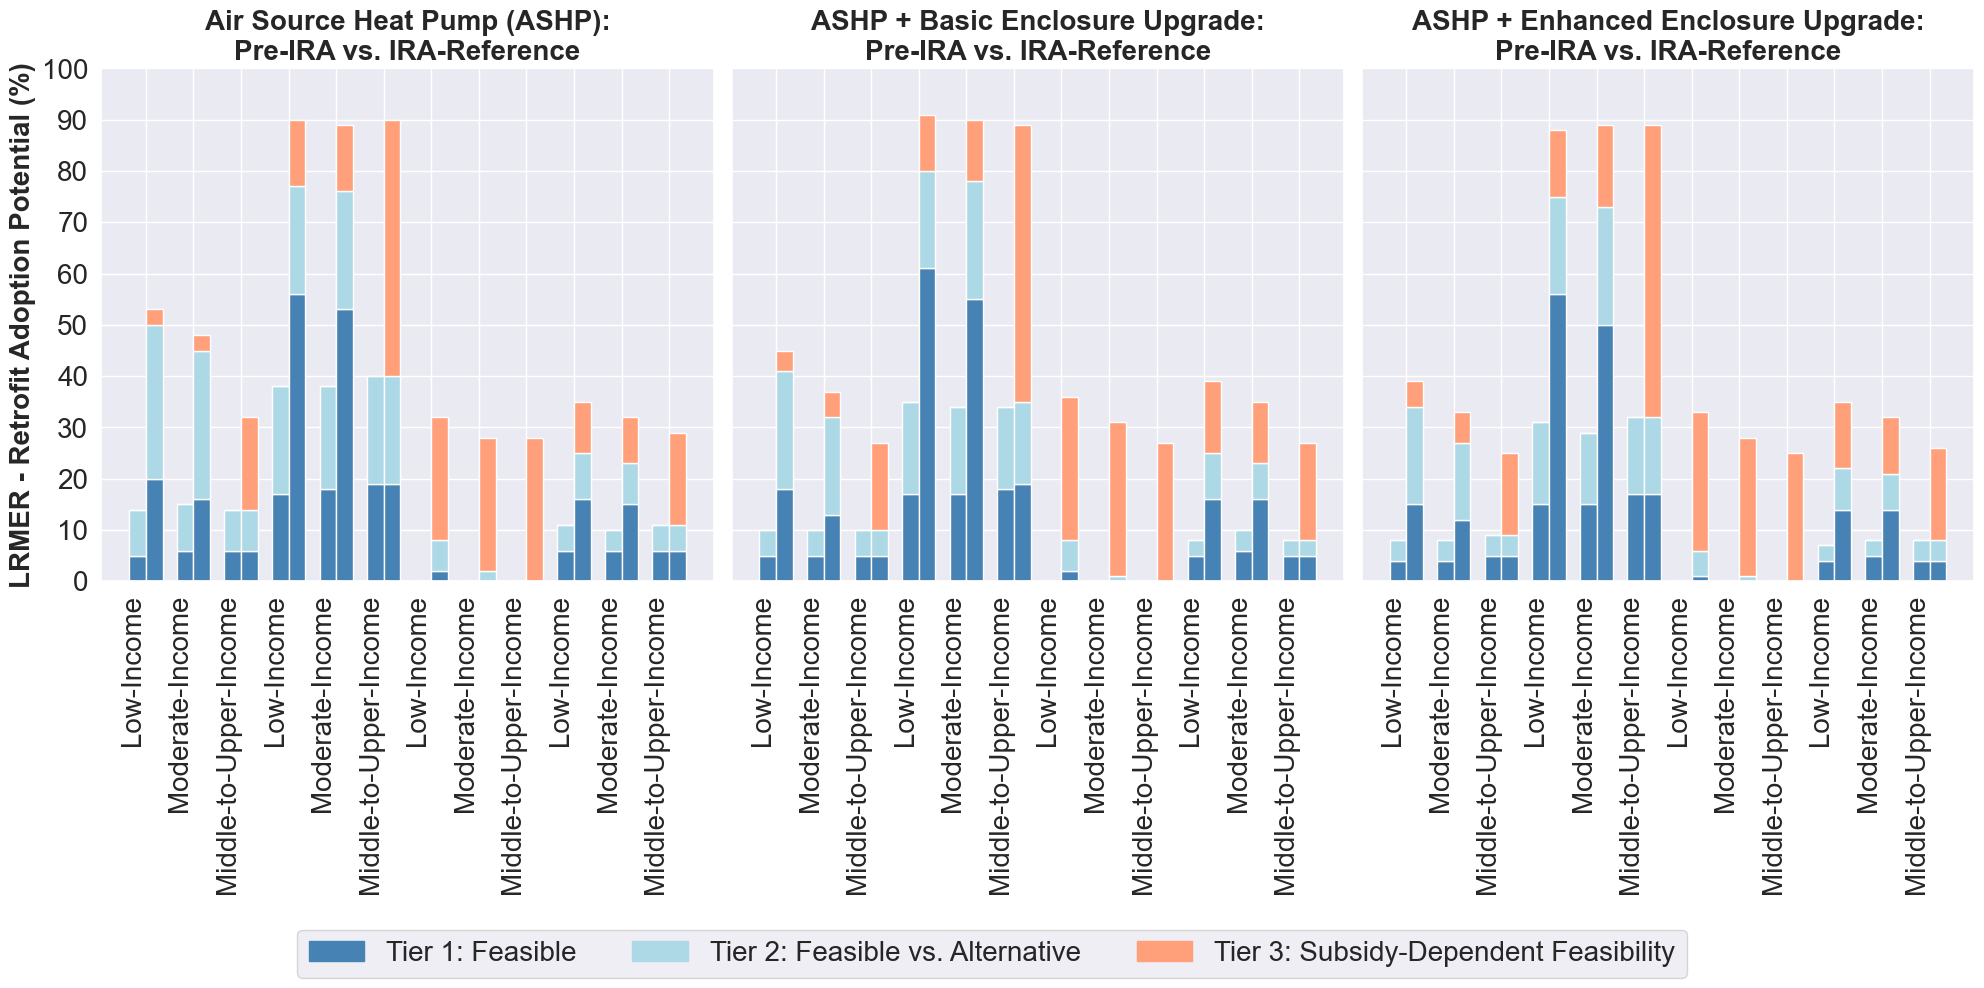

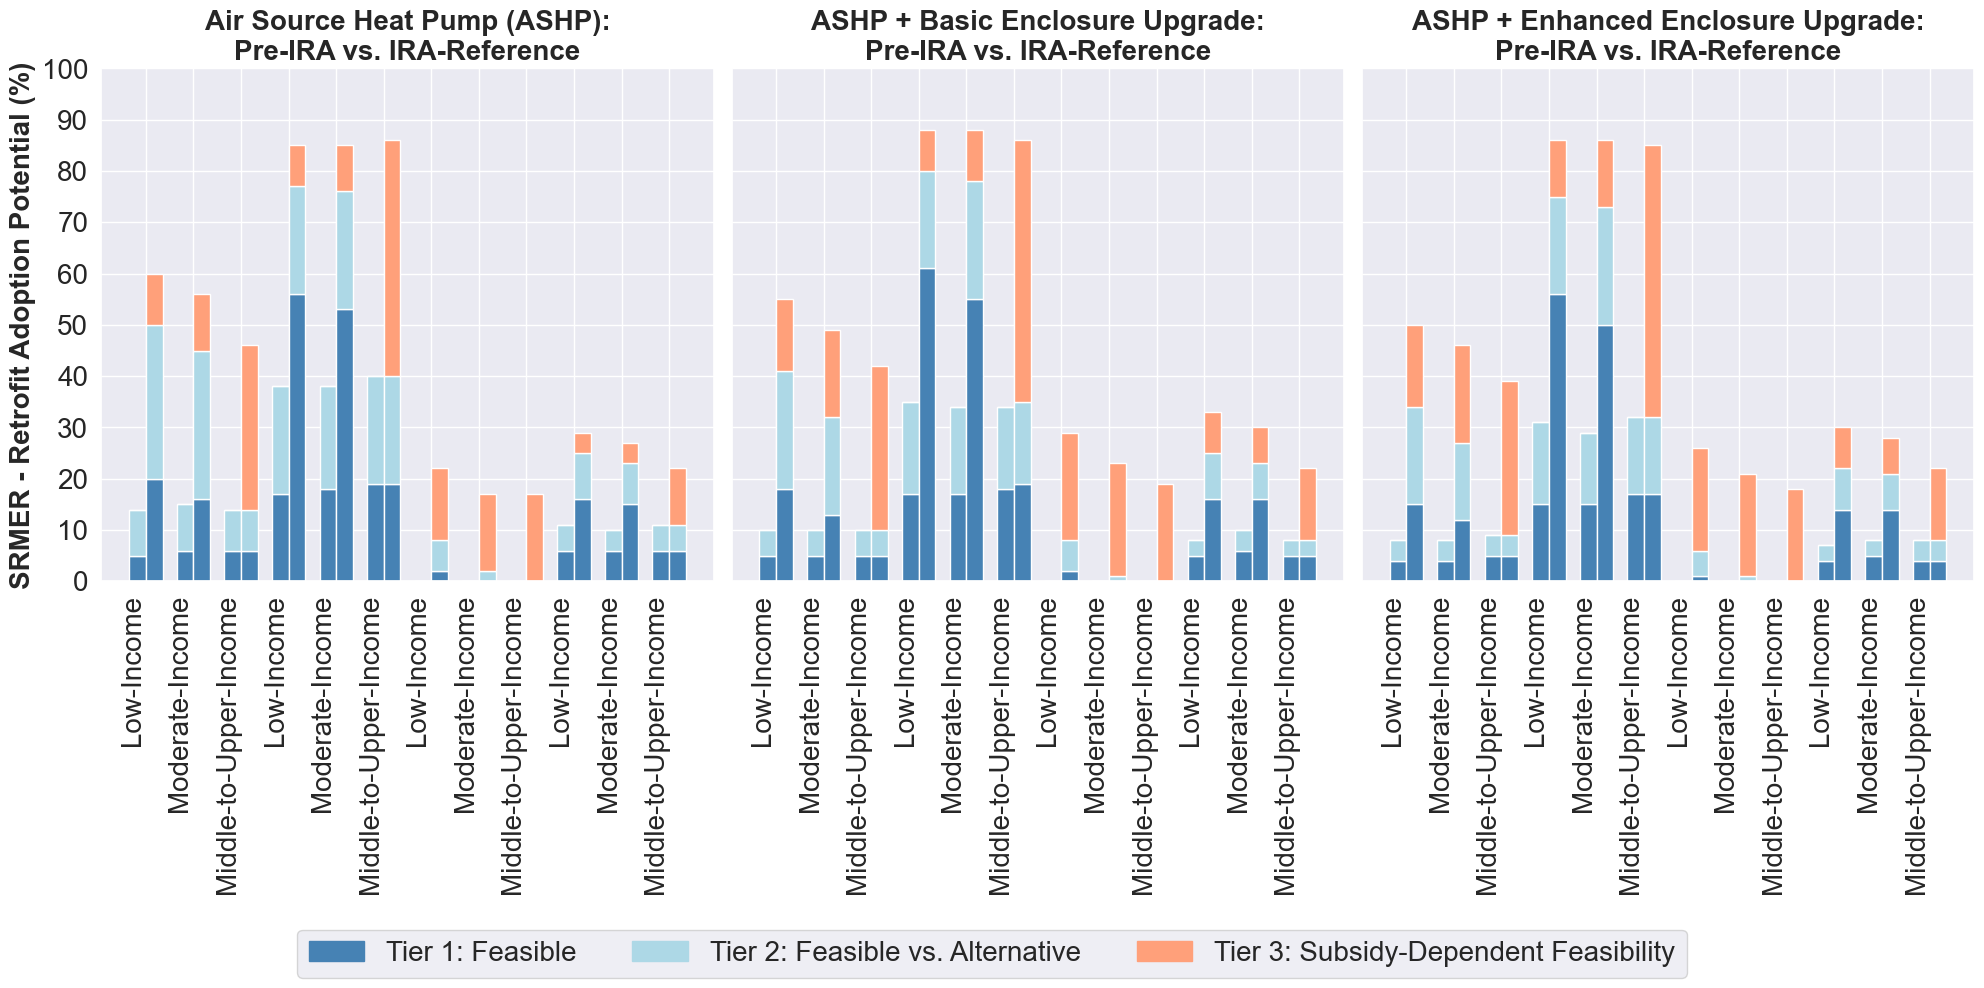

In [149]:
# LRMER
# SPACE HEATING - ALL 3 SCENARIOS
# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_heating_adoption_lrmer, 
                df_multiIndex_moderate_heating_adoption_lrmer, 
                df_multiIndex_advanced_heating_adoption_lrmer,
               ],
    scenarios_list = [
        ['preIRA_mp8_heating_adoption_lrmer', 'iraRef_mp8_heating_adoption_lrmer'],
        ['preIRA_mp9_heating_adoption_lrmer', 'iraRef_mp9_heating_adoption_lrmer'],
        ['preIRA_mp10_heating_adoption_lrmer', 'iraRef_mp10_heating_adoption_lrmer']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    # x_labels=["", "",
    #           "", "",
    #           "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)",
    #          ],
    plot_titles=["Air Source Heat Pump (ASHP):\nPre-IRA vs. IRA-Reference", "ASHP + Basic Enclosure Upgrade:\nPre-IRA vs. IRA-Reference", "ASHP + Enhanced Enclosure Upgrade:\nPre-IRA vs. IRA-Reference"],
    y_labels=["LRMER - Retrofit Adoption Potential (%)", "", "",
             ],
    figure_size=(20,10),
    sharex=True,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

# SRMER
# SPACE HEATING - ALL 3 SCENARIOS
# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_heating_adoption_srmer, 
                df_multiIndex_moderate_heating_adoption_srmer, 
                df_multiIndex_advanced_heating_adoption_srmer,
               ],
    scenarios_list = [
        ['preIRA_mp8_heating_adoption_srmer', 'iraRef_mp8_heating_adoption_srmer'],
        ['preIRA_mp9_heating_adoption_srmer', 'iraRef_mp9_heating_adoption_srmer'],
        ['preIRA_mp10_heating_adoption_srmer', 'iraRef_mp10_heating_adoption_srmer']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    # x_labels=["", "",
    #           "", "",
    #           "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)",
    #          ],
    plot_titles=["Air Source Heat Pump (ASHP):\nPre-IRA vs. IRA-Reference", "ASHP + Basic Enclosure Upgrade:\nPre-IRA vs. IRA-Reference", "ASHP + Enhanced Enclosure Upgrade:\nPre-IRA vs. IRA-Reference"],
    y_labels=["SRMER - Retrofit Adoption Potential (%)", "", "",
             ],
    figure_size=(20,10),
    sharex=True,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

In [150]:
df_multiIndex_basic_heating_adoption_lrmer

preIRA_mp8_heating_adoption_lrmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   
Fuel Oil          Low-Income                                                 17.0   
                  Moderate-Income                                            18.0   
                  Middle-to-Upper-Income                                     19.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  6.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 9.0   
                  Moderate-Income                                            9.0   
                  Middle-to-Upper-Income                                     8.0   
Fuel Oil          Low-Income                                                21.0   
                  Moderate-Income                                           20.0   
                  Middle-to-Upper-Income                                    21.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 5.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     5.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

In [151]:
df_multiIndex_basic_heating_adoption_srmer

preIRA_mp8_heating_adoption_srmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   
Fuel Oil          Low-Income                                                 17.0   
                  Moderate-Income                                            18.0   
                  Middle-to-Upper-Income                                     19.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  6.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      6.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 9.0   
                  Moderate-Income                                            9.0   
                  Middle-to-Upper-Income                                     8.0   
Fuel Oil          Low-Income                                                21.0   
                  Moderate-Income                                           20.0   
                  Middle-to-Upper-Income                                    21.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 5.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     5.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

In [152]:
df_multiIndex_moderate_heating_adoption_lrmer

preIRA_mp9_heating_adoption_lrmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             5.0   
                  Middle-to-Upper-Income                                      5.0   
Fuel Oil          Low-Income                                                 17.0   
                  Moderate-Income                                            17.0   
                  Middle-to-Upper-Income                                     18.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  5.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      5.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 5.0   
                  Moderate-Income                                            5.0   
                  Middle-to-Upper-Income                                     5.0   
Fuel Oil          Low-Income                                                18.0   
                  Moderate-Income                                           17.0   
                  Middle-to-Upper-Income                                    16.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 3.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     3.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

In [153]:
df_multiIndex_moderate_heating_adoption_srmer

preIRA_mp9_heating_adoption_srmer  \
                                                                 Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  5.0   
                  Moderate-Income                                             5.0   
                  Middle-to-Upper-Income                                      5.0   
Fuel Oil          Low-Income                                                 17.0   
                  Moderate-Income                                            17.0   
                  Middle-to-Upper-Income                                     18.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  5.0   
                  Moderate-Income                                             6.0   
                  Middle-to-Upper-Income                                      5.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 5.0   
                  Moderate-Income                                            5.0   
                  Middle-to-Upper-Income                                     5.0   
Fuel Oil          Low-Income                                                18.0   
                  Moderate-Income                                           17.0   
                  Middle-to-Upper-Income                                    16.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 3.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     3.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_heating_fuel lowMo

In [154]:
df_multiIndex_advanced_heating_adoption_lrmer

preIRA_mp10_heating_adoption_lrmer  \
                                                                  Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                      
Electricity       Low-Income                                                   4.0   
                  Moderate-Income                                              4.0   
                  Middle-to-Upper-Income                                       5.0   
Fuel Oil          Low-Income                                                  15.0   
                  Moderate-Income                                             15.0   
                  Middle-to-Upper-Income                                      17.0   
Natural Gas       Low-Income                                                   0.0   
                  Moderate-Income                                              0.0   
                  Middle-to-Upper-Income                                       0.0   
Propane           Low-Income                                                   4.0   
                  Moderate-Income                                              5.0   
                  Middle-to-Upper-Income                                       4.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     4.0   
Fuel Oil          Low-Income                                                16.0   
                  Moderate-Income                                           14.0   
                  Middle-to-Upper-Income                                    15.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 3.0   
                  Moderate-Income                                            3.0   
                  Middle-to-Upper-Income                                     4.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_hea

In [155]:
df_multiIndex_advanced_heating_adoption_srmer

preIRA_mp10_heating_adoption_srmer  \
                                                                  Tier 1: Feasible   
base_heating_fuel lowModerateIncome_designation                                      
Electricity       Low-Income                                                   4.0   
                  Moderate-Income                                              4.0   
                  Middle-to-Upper-Income                                       5.0   
Fuel Oil          Low-Income                                                  15.0   
                  Moderate-Income                                             15.0   
                  Middle-to-Upper-Income                                      17.0   
Natural Gas       Low-Income                                                   0.0   
                  Moderate-Income                                              0.0   
                  Middle-to-Upper-Income                                       0.0   
Propane           Low-Income                                                   4.0   
                  Moderate-Income                                              5.0   
                  Middle-to-Upper-Income                                       4.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_heating_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     4.0   
Fuel Oil          Low-Income                                                16.0   
                  Moderate-Income                                           14.0   
                  Middle-to-Upper-Income                                    15.0   
Natural Gas       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Propane           Low-Income                                                 3.0   
                  Moderate-Income                                            3.0   
                  Middle-to-Upper-Income                                     4.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Fuel Oil          Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_hea

# Water Heating, Clothes Drying, and Cooking

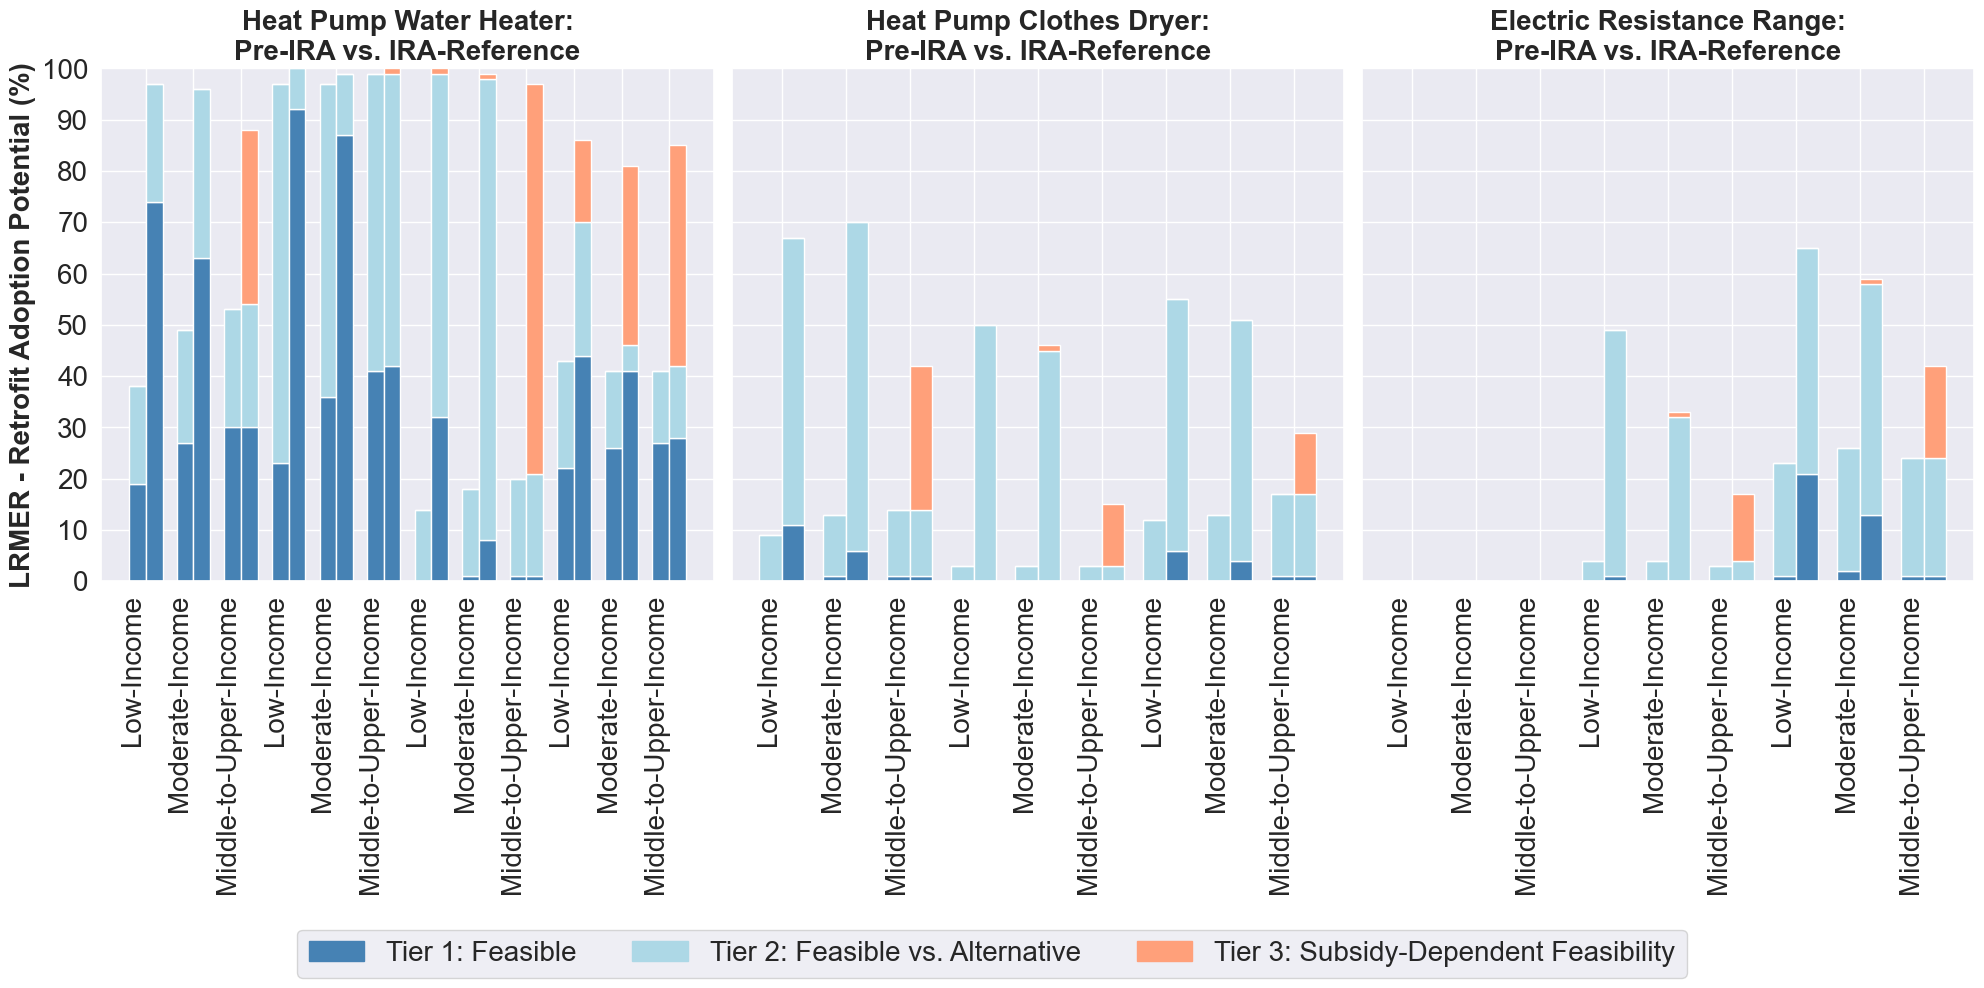

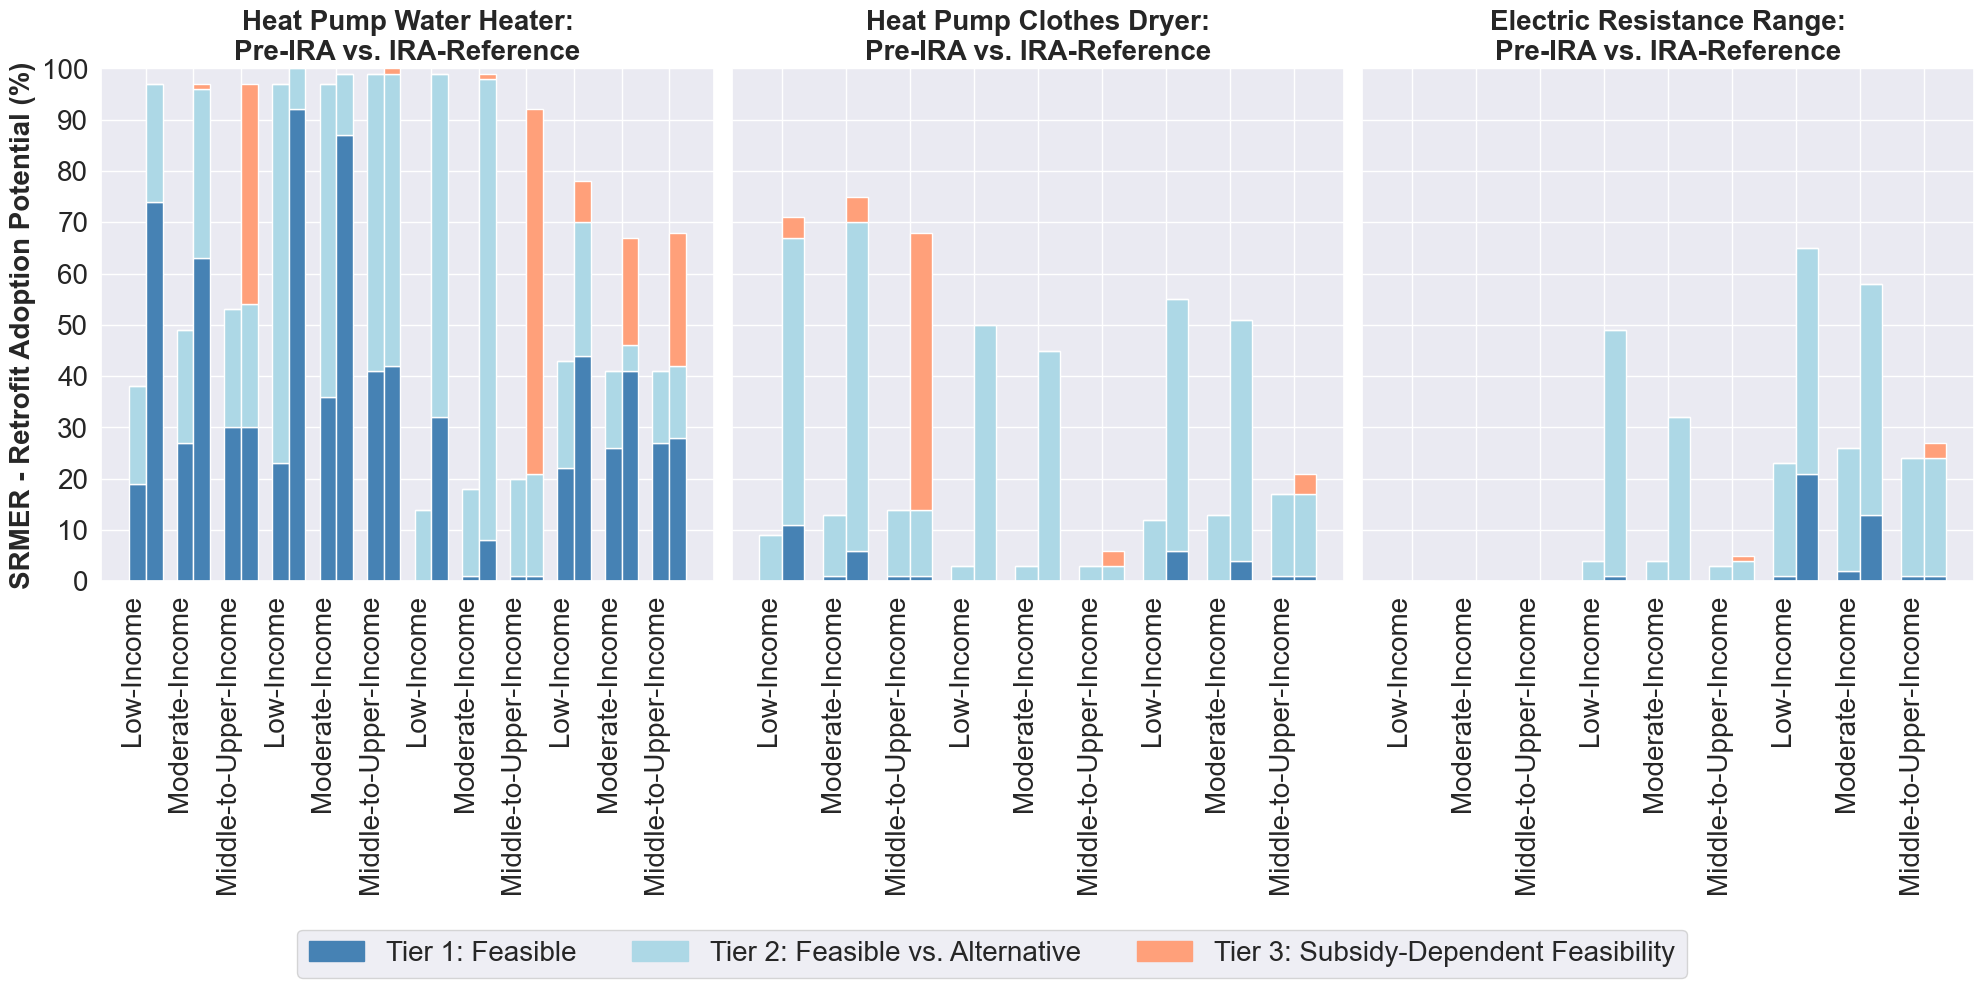

In [156]:
# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_waterHeating_adoption_lrmer, 
                df_multiIndex_basic_clothesDrying_adoption_lrmer, 
                df_multiIndex_basic_cooking_adoption_lrmer,
               ],
    scenarios_list = [
        ['preIRA_mp8_waterHeating_adoption_lrmer', 'iraRef_mp8_waterHeating_adoption_lrmer'],
        ['preIRA_mp8_clothesDrying_adoption_lrmer', 'iraRef_mp8_clothesDrying_adoption_lrmer'],
        ['preIRA_mp8_cooking_adoption_lrmer', 'iraRef_mp8_cooking_adoption_lrmer']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2),
                    #    (1, 0), (1, 1), (1, 2),
                    #    (2, 0), (2, 1), (2, 2)
                       ],
    x_labels=["", "", "",
              "", "", "",
              "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)", ""
             ],
    plot_titles=["Heat Pump Water Heater:\nPre-IRA vs. IRA-Reference", "Heat Pump Clothes Dryer:\nPre-IRA vs. IRA-Reference", "Electric Resistance Range:\nPre-IRA vs. IRA-Reference"],
    y_labels=["LRMER - Retrofit Adoption Potential (%)", "", "",
             ],
    figure_size=(20,10),
    sharex=False,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_waterHeating_adoption_srmer, 
                df_multiIndex_basic_clothesDrying_adoption_srmer, 
                df_multiIndex_basic_cooking_adoption_srmer,
               ],
    scenarios_list = [
        ['preIRA_mp8_waterHeating_adoption_srmer', 'iraRef_mp8_waterHeating_adoption_srmer'],
        ['preIRA_mp8_clothesDrying_adoption_srmer', 'iraRef_mp8_clothesDrying_adoption_srmer'],
        ['preIRA_mp8_cooking_adoption_srmer', 'iraRef_mp8_cooking_adoption_srmer']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2),
                    #    (1, 0), (1, 1), (1, 2),
                    #    (2, 0), (2, 1), (2, 2)
                       ],
    x_labels=["", "", "",
              "", "", "",
              "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)", ""
             ],
    plot_titles=["Heat Pump Water Heater:\nPre-IRA vs. IRA-Reference", "Heat Pump Clothes Dryer:\nPre-IRA vs. IRA-Reference", "Electric Resistance Range:\nPre-IRA vs. IRA-Reference"],
    y_labels=["SRMER - Retrofit Adoption Potential (%)", "", "",
             ],
    figure_size=(20,10),
    sharex=False,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

In [157]:
df_multiIndex_basic_waterHeating_adoption_lrmer

preIRA_mp8_waterHeating_adoption_lrmer  \
                                                                           Tier 1: Feasible   
base_waterHeating_fuel lowModerateIncome_designation                                          
Electricity            Low-Income                                                      19.0   
                       Moderate-Income                                                 27.0   
                       Middle-to-Upper-Income                                          30.0   
Fuel Oil               Low-Income                                                      23.0   
                       Moderate-Income                                                 36.0   
                       Middle-to-Upper-Income                                          41.0   
Natural Gas            Low-Income                                                       0.0   
                       Moderate-Income                                                  1.0   
                       Middle-to-Upper-Income                                           1.0   
Propane                Low-Income                                                      22.0   
                       Moderate-Income                                                 26.0   
                       Middle-to-Upper-Income                                          27.0   

                                                                                       \
                                                     Tier 2: Feasible vs. Alternative   
base_waterHeating_fuel lowModerateIncome_designation                                    
Electricity            Low-Income                                                19.0   
                       Moderate-Income                                           22.0   
                       Middle-to-Upper-Income                                    23.0   
Fuel Oil               Low-Income                                                74.0   
                       Moderate-Income                                           61.0   
                       Middle-to-Upper-Income                                    58.0   
Natural Gas            Low-Income                                                14.0   
                       Moderate-Income                                           17.0   
                       Middle-to-Upper-Income                                    19.0   
Propane                Low-Income                                                21.0   
                       Moderate-Income                                           15.0   
                       Middle-to-Upper-Income                                    14.0   

                                                                                            \
                                                     Tier 3: Subsidy-Dependent Feasibility   
base_waterHeating_fuel lowModerateIncome_designation                                         
Electricity            Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Fuel Oil               Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Natural Gas            Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Propane                Low-Income                                                      0.0   
                       Moderate-Income                               

In [158]:
df_multiIndex_basic_waterHeating_adoption_srmer

preIRA_mp8_waterHeating_adoption_srmer  \
                                                                           Tier 1: Feasible   
base_waterHeating_fuel lowModerateIncome_designation                                          
Electricity            Low-Income                                                      19.0   
                       Moderate-Income                                                 27.0   
                       Middle-to-Upper-Income                                          30.0   
Fuel Oil               Low-Income                                                      23.0   
                       Moderate-Income                                                 36.0   
                       Middle-to-Upper-Income                                          41.0   
Natural Gas            Low-Income                                                       0.0   
                       Moderate-Income                                                  1.0   
                       Middle-to-Upper-Income                                           1.0   
Propane                Low-Income                                                      22.0   
                       Moderate-Income                                                 26.0   
                       Middle-to-Upper-Income                                          27.0   

                                                                                       \
                                                     Tier 2: Feasible vs. Alternative   
base_waterHeating_fuel lowModerateIncome_designation                                    
Electricity            Low-Income                                                19.0   
                       Moderate-Income                                           22.0   
                       Middle-to-Upper-Income                                    23.0   
Fuel Oil               Low-Income                                                74.0   
                       Moderate-Income                                           61.0   
                       Middle-to-Upper-Income                                    58.0   
Natural Gas            Low-Income                                                14.0   
                       Moderate-Income                                           17.0   
                       Middle-to-Upper-Income                                    19.0   
Propane                Low-Income                                                21.0   
                       Moderate-Income                                           15.0   
                       Middle-to-Upper-Income                                    14.0   

                                                                                            \
                                                     Tier 3: Subsidy-Dependent Feasibility   
base_waterHeating_fuel lowModerateIncome_designation                                         
Electricity            Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Fuel Oil               Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Natural Gas            Low-Income                                                      0.0   
                       Moderate-Income                                                 0.0   
                       Middle-to-Upper-Income                                          0.0   
Propane                Low-Income                                                      0.0   
                       Moderate-Income                               

In [159]:
df_multiIndex_basic_clothesDrying_adoption_lrmer

preIRA_mp8_clothesDrying_adoption_lrmer  \
                                                                             Tier 1: Feasible   
base_clothesDrying_fuel lowModerateIncome_designation                                           
Electricity             Low-Income                                                        0.0   
                        Moderate-Income                                                   1.0   
                        Middle-to-Upper-Income                                            1.0   
Natural Gas             Low-Income                                                        0.0   
                        Moderate-Income                                                   0.0   
                        Middle-to-Upper-Income                                            0.0   
Propane                 Low-Income                                                        0.0   
                        Moderate-Income                                                   0.0   
                        Middle-to-Upper-Income                                            1.0   

                                                                                        \
                                                      Tier 2: Feasible vs. Alternative   
base_clothesDrying_fuel lowModerateIncome_designation                                    
Electricity             Low-Income                                                 9.0   
                        Moderate-Income                                           12.0   
                        Middle-to-Upper-Income                                    13.0   
Natural Gas             Low-Income                                                 3.0   
                        Moderate-Income                                            3.0   
                        Middle-to-Upper-Income                                     3.0   
Propane                 Low-Income                                                12.0   
                        Moderate-Income                                           13.0   
                        Middle-to-Upper-Income                                    16.0   

                                                                                             \
                                                      Tier 3: Subsidy-Dependent Feasibility   
base_clothesDrying_fuel lowModerateIncome_designation                                         
Electricity             Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   
Natural Gas             Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   
Propane                 Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   

                                                                                \
                                                      Total Adoption Potential   
base_clothesDrying_fuel lowModerateIncome_designation                            
Electricity             Low-Income                                         9.0   
                        Moderate-Income                                   13.0   
                        Middle-to-Upper-Income                            14.0   
Natural Gas             Low-Income                                         3.0   
                        Moderate-Income                                    3.0   
           

In [160]:
df_multiIndex_basic_clothesDrying_adoption_srmer

preIRA_mp8_clothesDrying_adoption_srmer  \
                                                                             Tier 1: Feasible   
base_clothesDrying_fuel lowModerateIncome_designation                                           
Electricity             Low-Income                                                        0.0   
                        Moderate-Income                                                   1.0   
                        Middle-to-Upper-Income                                            1.0   
Natural Gas             Low-Income                                                        0.0   
                        Moderate-Income                                                   0.0   
                        Middle-to-Upper-Income                                            0.0   
Propane                 Low-Income                                                        0.0   
                        Moderate-Income                                                   0.0   
                        Middle-to-Upper-Income                                            1.0   

                                                                                        \
                                                      Tier 2: Feasible vs. Alternative   
base_clothesDrying_fuel lowModerateIncome_designation                                    
Electricity             Low-Income                                                 9.0   
                        Moderate-Income                                           12.0   
                        Middle-to-Upper-Income                                    13.0   
Natural Gas             Low-Income                                                 3.0   
                        Moderate-Income                                            3.0   
                        Middle-to-Upper-Income                                     3.0   
Propane                 Low-Income                                                12.0   
                        Moderate-Income                                           13.0   
                        Middle-to-Upper-Income                                    16.0   

                                                                                             \
                                                      Tier 3: Subsidy-Dependent Feasibility   
base_clothesDrying_fuel lowModerateIncome_designation                                         
Electricity             Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   
Natural Gas             Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   
Propane                 Low-Income                                                      0.0   
                        Moderate-Income                                                 0.0   
                        Middle-to-Upper-Income                                          0.0   

                                                                                \
                                                      Total Adoption Potential   
base_clothesDrying_fuel lowModerateIncome_designation                            
Electricity             Low-Income                                         9.0   
                        Moderate-Income                                   13.0   
                        Middle-to-Upper-Income                            14.0   
Natural Gas             Low-Income                                         3.0   
                        Moderate-Income                                    3.0   
           

In [161]:
df_multiIndex_basic_cooking_adoption_lrmer

preIRA_mp8_cooking_adoption_lrmer  \
                                                                 Tier 1: Feasible   
base_cooking_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  1.0   
                  Moderate-Income                                             2.0   
                  Middle-to-Upper-Income                                      1.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_cooking_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Natural Gas       Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     3.0   
Propane           Low-Income                                                22.0   
                  Moderate-Income                                           24.0   
                  Middle-to-Upper-Income                                    23.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_cooking_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_cooking_fuel lowModerateIncome_designation                            
Electricity       Low-Income                                         0.0   
                  Moderate-Income                                    0.0   
                  Middle-to-Upper-Income                             0.0   
Natural Gas       Low-Income                                         4.0   
                  Moderate-Income                                    4.0   
                  Middle-to-Upper-Income                             3.0   
Propane           Low-Income                                        23.0   
                  Moderate-Income                                   26.0   
                  Middle-to-Upper-Income                            24.0   

                                    

In [162]:
df_multiIndex_basic_cooking_adoption_srmer

preIRA_mp8_cooking_adoption_srmer  \
                                                                 Tier 1: Feasible   
base_cooking_fuel lowModerateIncome_designation                                     
Electricity       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Natural Gas       Low-Income                                                  0.0   
                  Moderate-Income                                             0.0   
                  Middle-to-Upper-Income                                      0.0   
Propane           Low-Income                                                  1.0   
                  Moderate-Income                                             2.0   
                  Middle-to-Upper-Income                                      1.0   

                                                                                  \
                                                Tier 2: Feasible vs. Alternative   
base_cooking_fuel lowModerateIncome_designation                                    
Electricity       Low-Income                                                 0.0   
                  Moderate-Income                                            0.0   
                  Middle-to-Upper-Income                                     0.0   
Natural Gas       Low-Income                                                 4.0   
                  Moderate-Income                                            4.0   
                  Middle-to-Upper-Income                                     3.0   
Propane           Low-Income                                                22.0   
                  Moderate-Income                                           24.0   
                  Middle-to-Upper-Income                                    23.0   

                                                                                       \
                                                Tier 3: Subsidy-Dependent Feasibility   
base_cooking_fuel lowModerateIncome_designation                                         
Electricity       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Natural Gas       Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   
Propane           Low-Income                                                      0.0   
                  Moderate-Income                                                 0.0   
                  Middle-to-Upper-Income                                          0.0   

                                                                          \
                                                Total Adoption Potential   
base_cooking_fuel lowModerateIncome_designation                            
Electricity       Low-Income                                         0.0   
                  Moderate-Income                                    0.0   
                  Middle-to-Upper-Income                             0.0   
Natural Gas       Low-Income                                         4.0   
                  Moderate-Income                                    4.0   
                  Middle-to-Upper-Income                             3.0   
Propane           Low-Income                                        23.0   
                  Moderate-Income                                   26.0   
                  Middle-to-Upper-Income                            24.0   

                                    

# Cost-Effectiveness and Retrofit Priorities
## Dollars of IRA Rebate Invested per mtCO2e Avoided

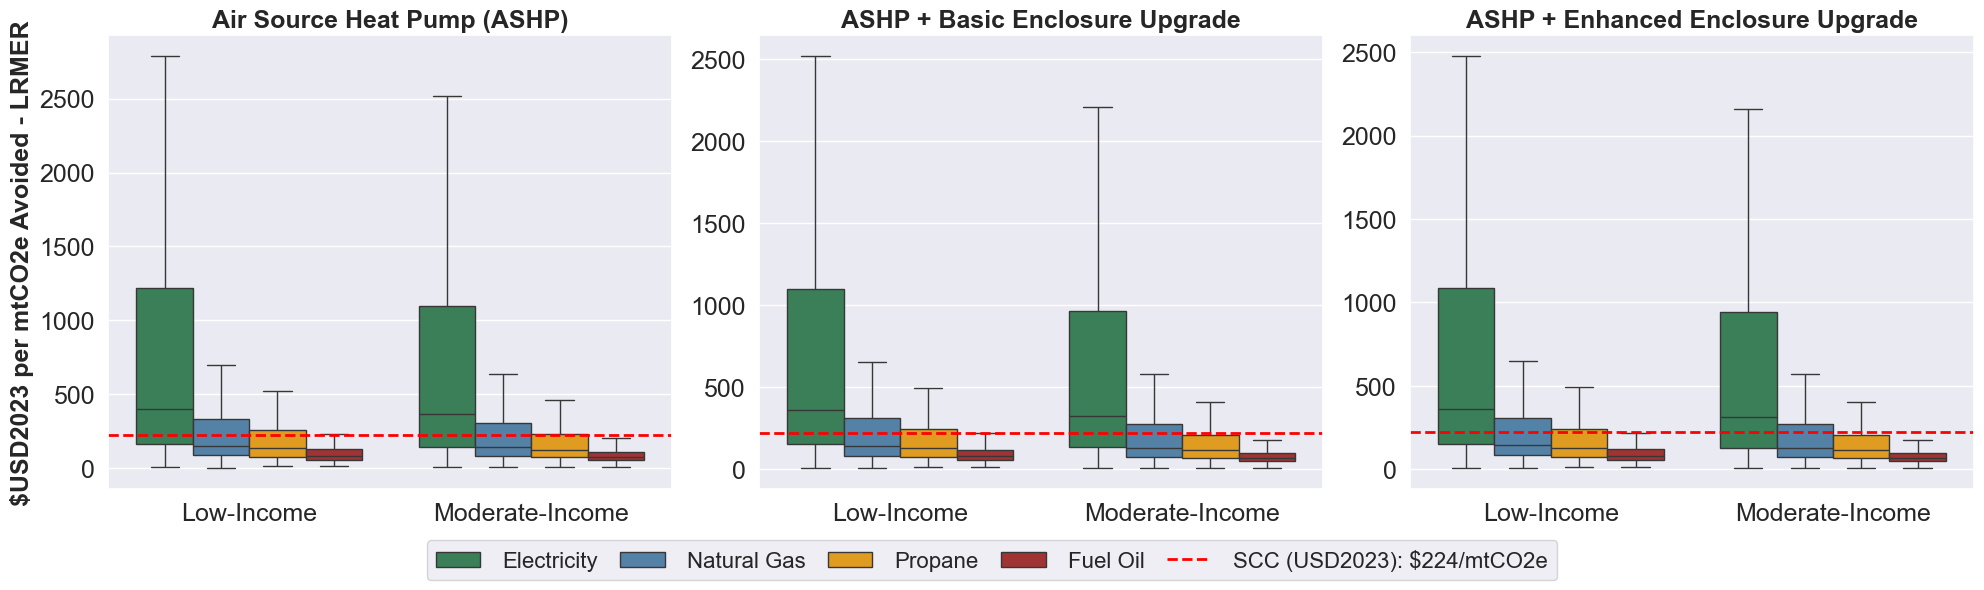

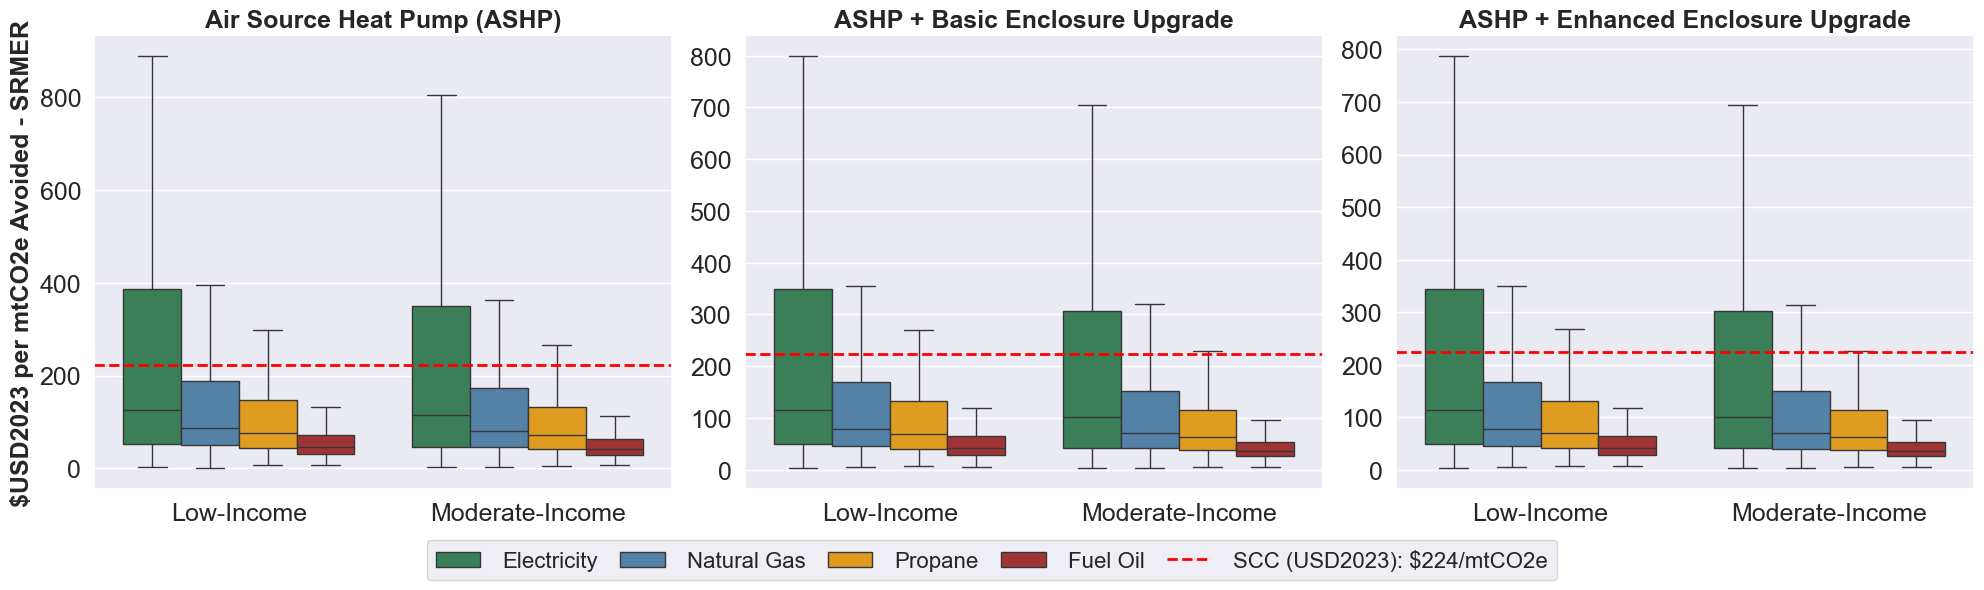

In [163]:
# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_heating, df_moderate_summary_heating, df_advanced_summary_heating],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_heating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp9_heating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp10_heating_usd2023_per_mtCO2e_lrmer'],
    hues=['base_heating_fuel', 'base_heating_fuel', 'base_heating_fuel'],
    plot_titles=["Air Source Heat Pump (ASHP)", "ASHP + Basic Enclosure Upgrade", "ASHP + Enhanced Enclosure Upgrade"],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - LRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=False
)

# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_heating, df_moderate_summary_heating, df_advanced_summary_heating],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_heating_usd2023_per_mtCO2e_srmer', 'iraRef_mp9_heating_usd2023_per_mtCO2e_srmer', 'iraRef_mp10_heating_usd2023_per_mtCO2e_srmer'],
    hues=['base_heating_fuel', 'base_heating_fuel', 'base_heating_fuel'],
    plot_titles=["Air Source Heat Pump (ASHP)", "ASHP + Basic Enclosure Upgrade", "ASHP + Enhanced Enclosure Upgrade"],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - SRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=False
)

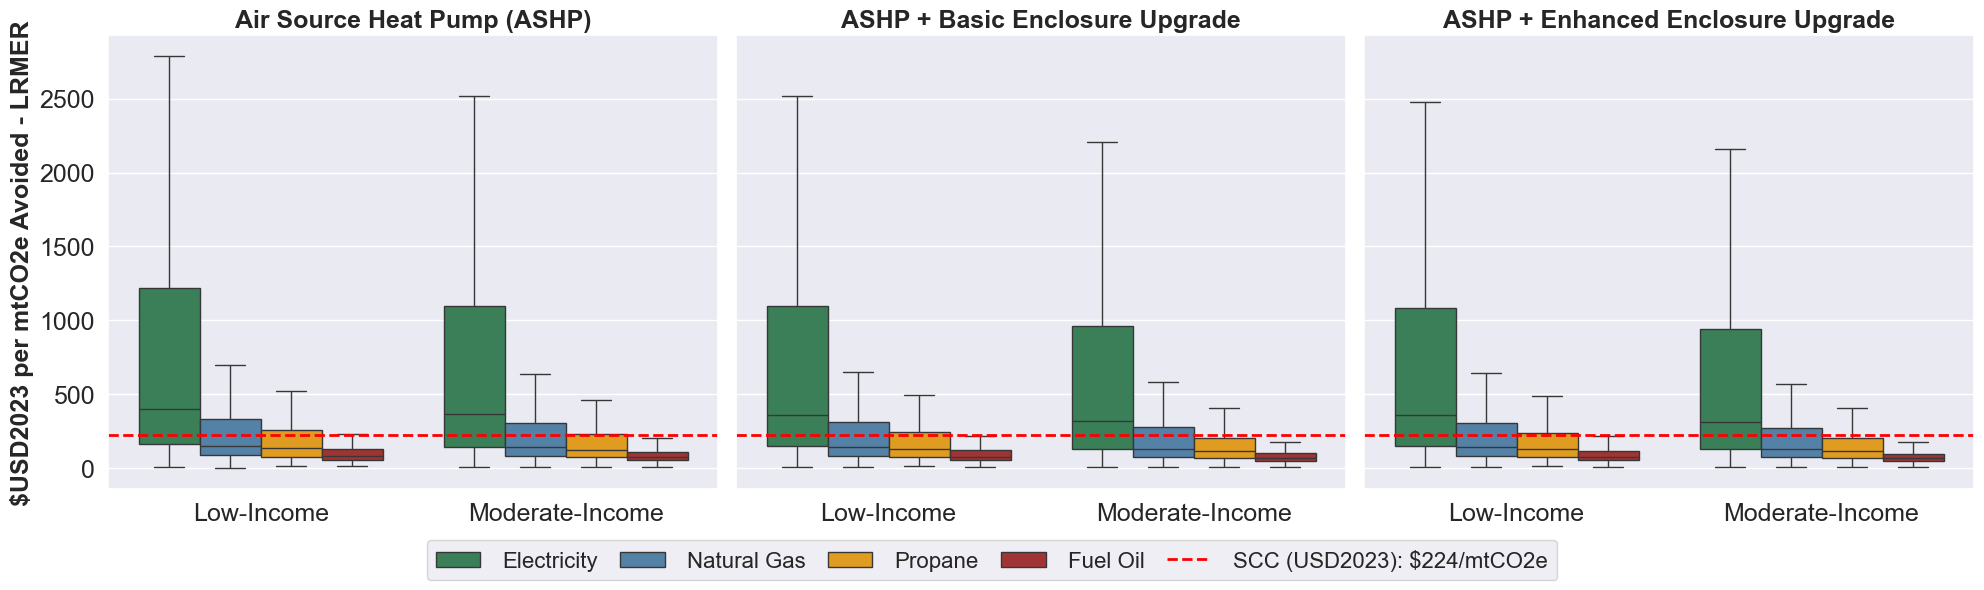

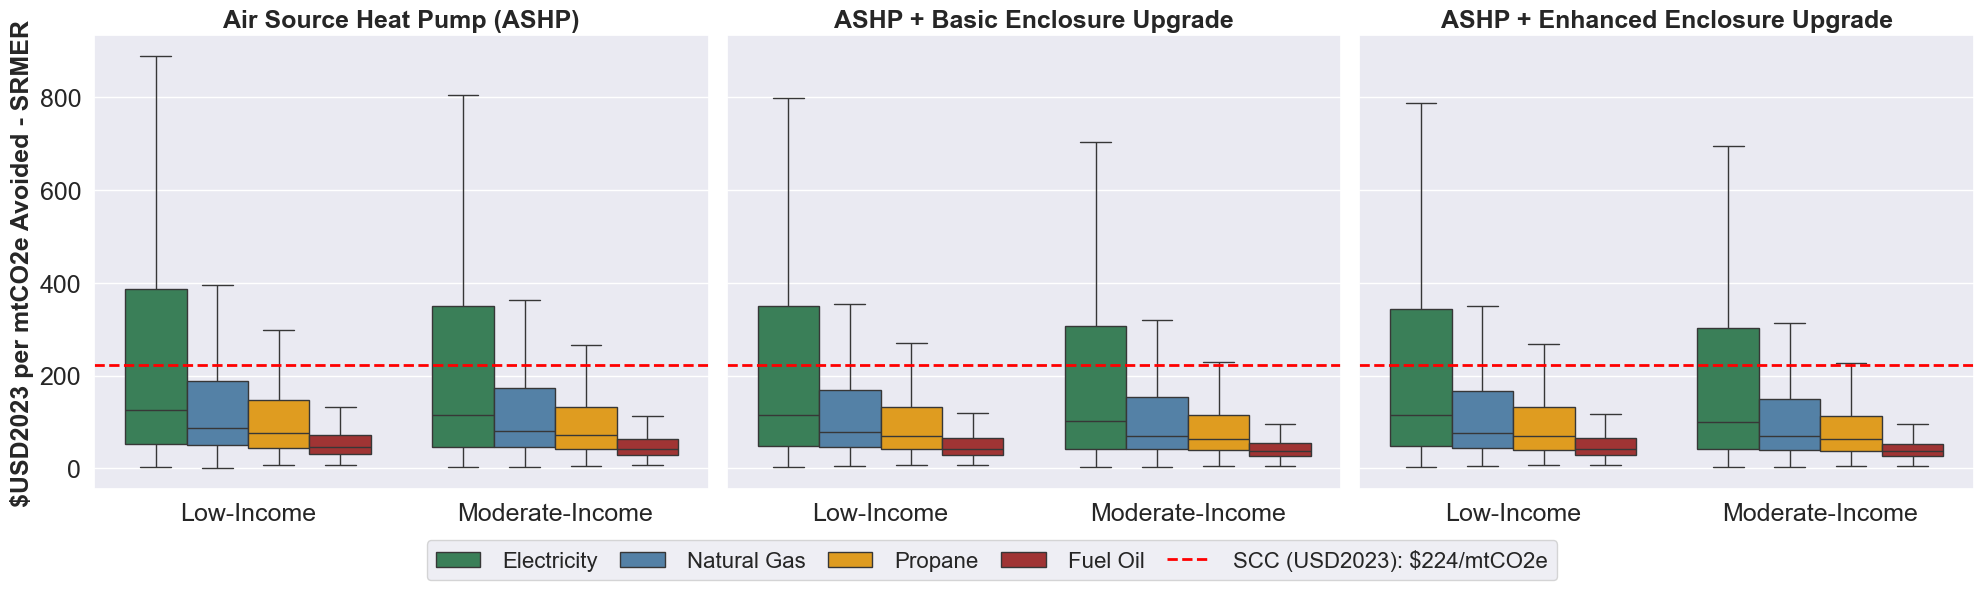

In [164]:
# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_heating, df_moderate_summary_heating, df_advanced_summary_heating],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_heating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp9_heating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp10_heating_usd2023_per_mtCO2e_lrmer'],
    hues=['base_heating_fuel', 'base_heating_fuel', 'base_heating_fuel'],
    plot_titles=["Air Source Heat Pump (ASHP)", "ASHP + Basic Enclosure Upgrade", "ASHP + Enhanced Enclosure Upgrade"],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - LRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=True
)

# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_heating, df_moderate_summary_heating, df_advanced_summary_heating],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_heating_usd2023_per_mtCO2e_srmer', 'iraRef_mp9_heating_usd2023_per_mtCO2e_srmer', 'iraRef_mp10_heating_usd2023_per_mtCO2e_srmer'],
    hues=['base_heating_fuel', 'base_heating_fuel', 'base_heating_fuel'],
    plot_titles=["Air Source Heat Pump (ASHP)", "ASHP + Basic Enclosure Upgrade", "ASHP + Enhanced Enclosure Upgrade"],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - SRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=True
)

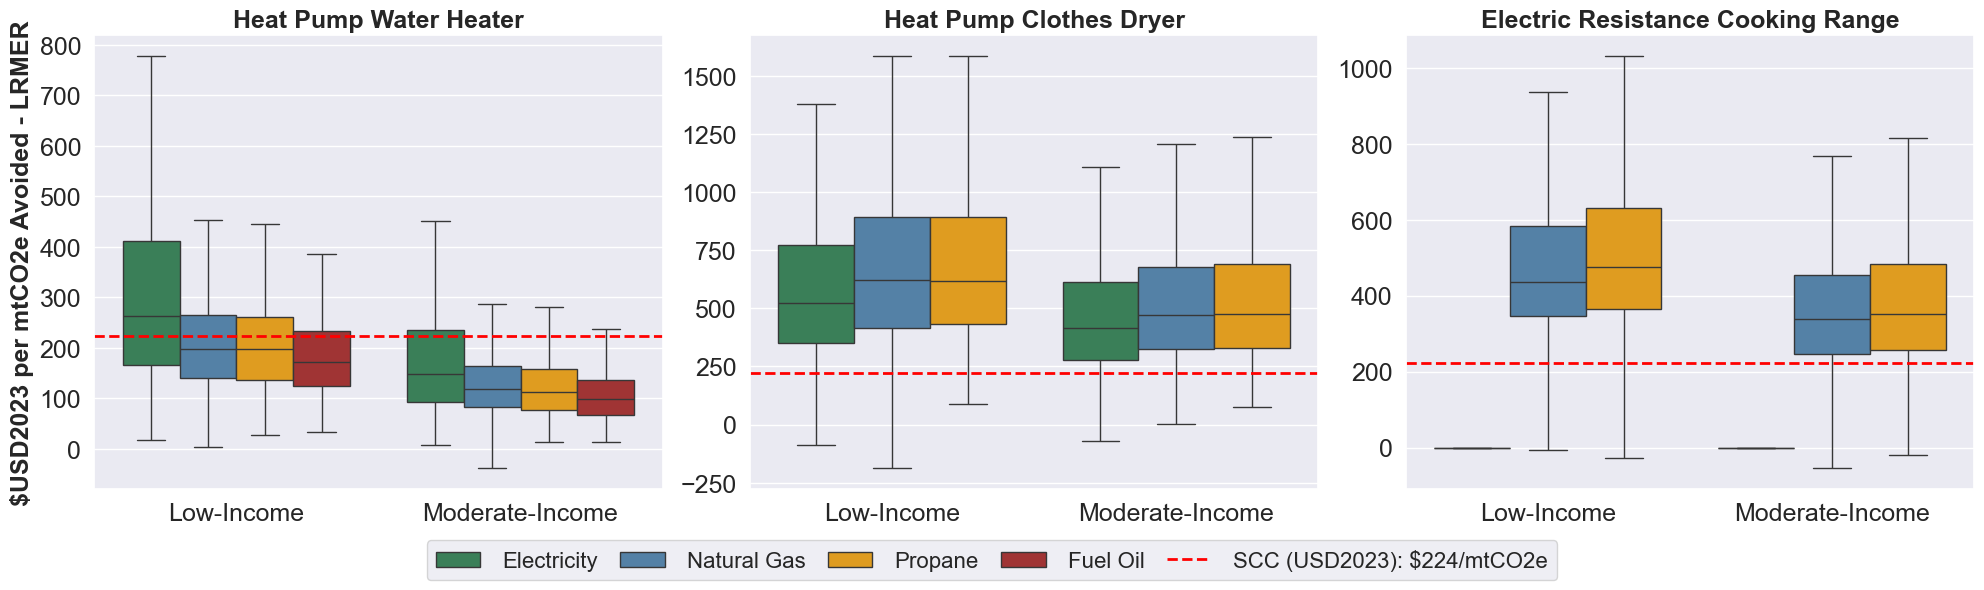

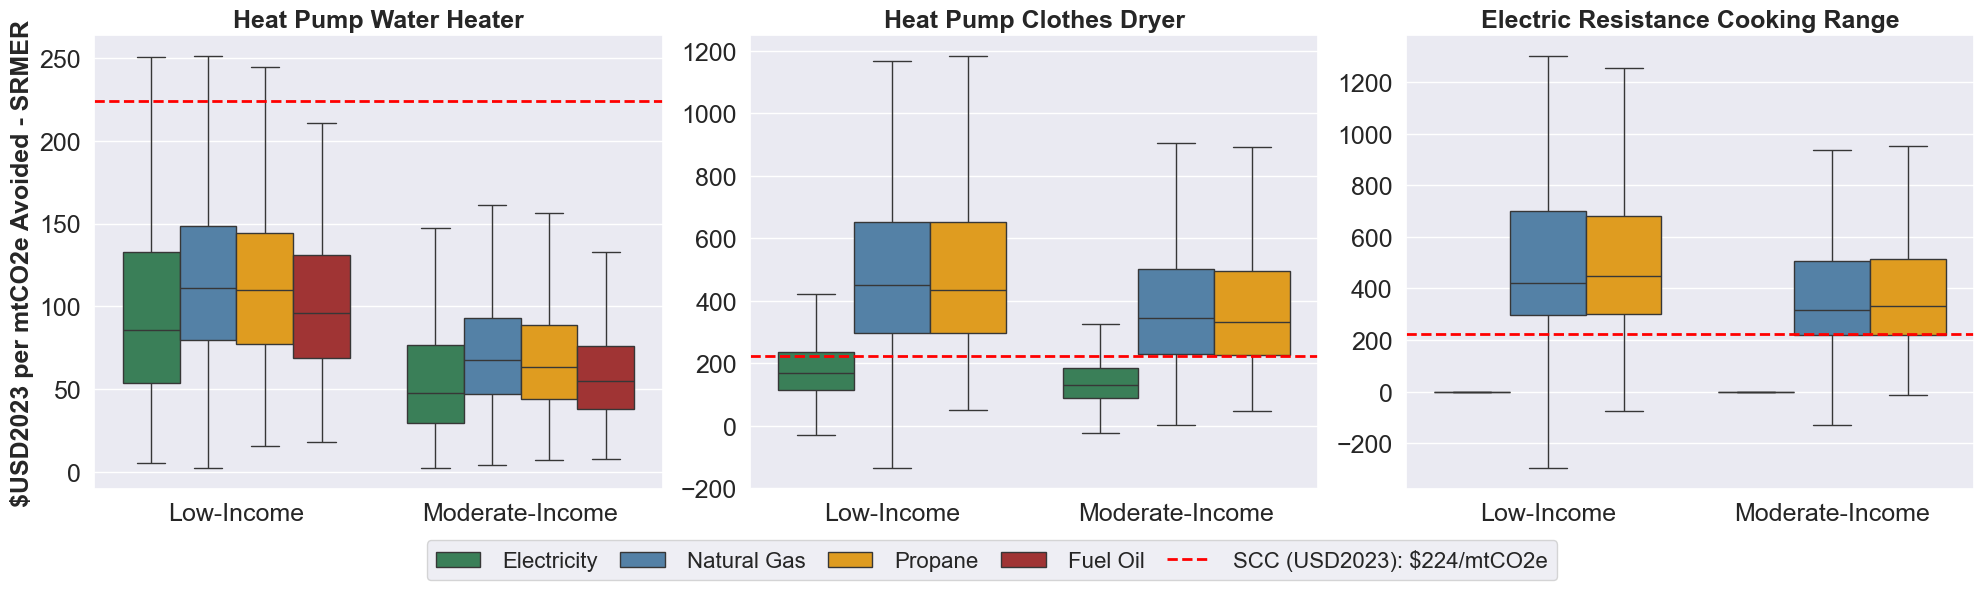

In [165]:
# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_waterHeating, df_basic_summary_clothesDrying, df_basic_summary_cooking],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_waterHeating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp8_clothesDrying_usd2023_per_mtCO2e_lrmer', 'iraRef_mp8_cooking_usd2023_per_mtCO2e_lrmer'],
    hues=['base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel'],
    plot_titles=['Heat Pump Water Heater', 'Heat Pump Clothes Dryer', 'Electric Resistance Cooking Range'],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - LRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=False
)

# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_waterHeating, df_basic_summary_clothesDrying, df_basic_summary_cooking],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_waterHeating_usd2023_per_mtCO2e_srmer', 'iraRef_mp8_clothesDrying_usd2023_per_mtCO2e_srmer', 'iraRef_mp8_cooking_usd2023_per_mtCO2e_srmer'],
    hues=['base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel'],
    plot_titles=['Heat Pump Water Heater', 'Heat Pump Clothes Dryer', 'Electric Resistance Cooking Range'],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - SRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=False
)

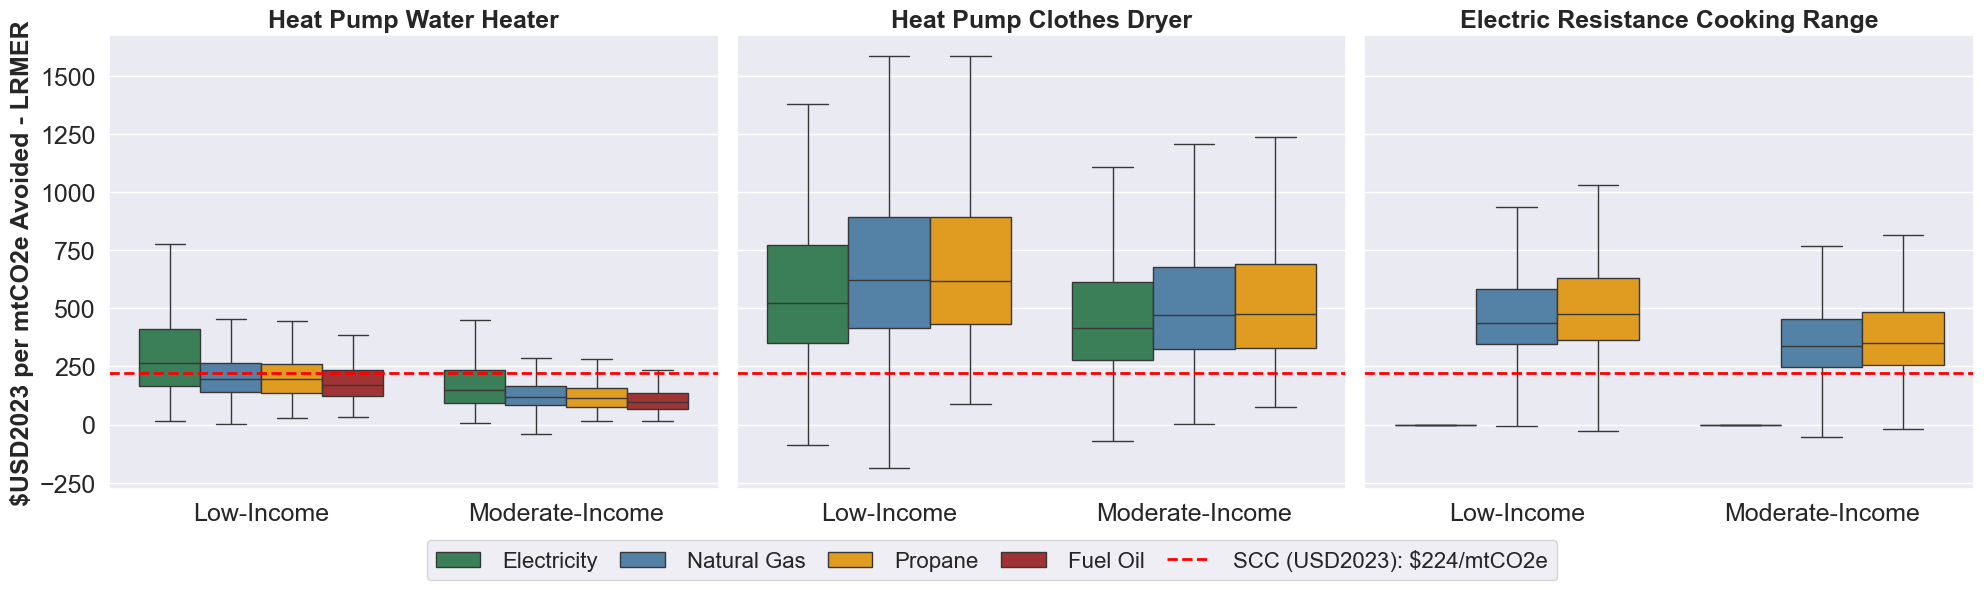

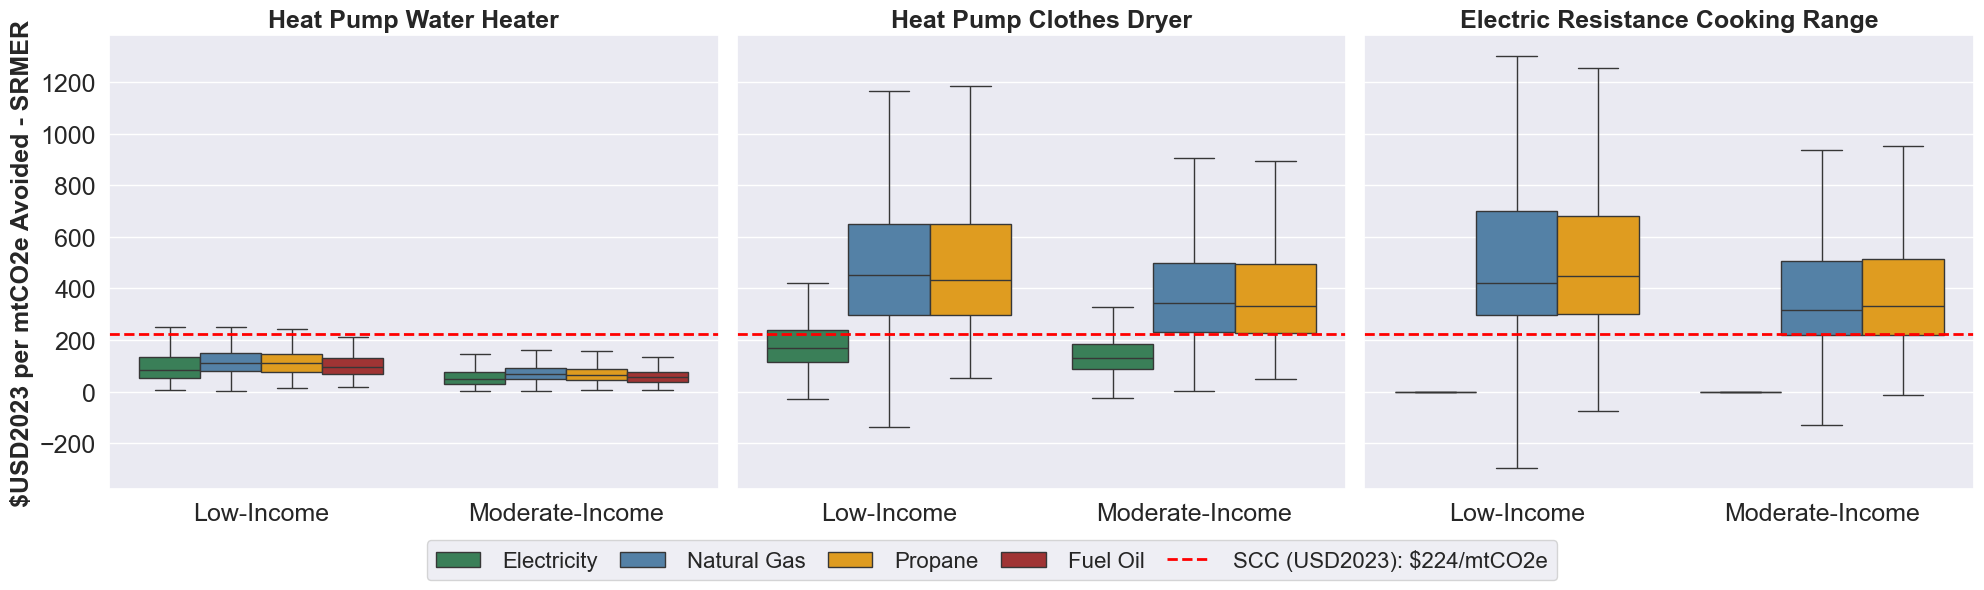

In [166]:
# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_waterHeating, df_basic_summary_clothesDrying, df_basic_summary_cooking],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_waterHeating_usd2023_per_mtCO2e_lrmer', 'iraRef_mp8_clothesDrying_usd2023_per_mtCO2e_lrmer', 'iraRef_mp8_cooking_usd2023_per_mtCO2e_lrmer'],
    hues=['base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel'],
    plot_titles=['Heat Pump Water Heater', 'Heat Pump Clothes Dryer', 'Electric Resistance Cooking Range'],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - LRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=True
)

# Example usage
subplot_grid_co2_abatement(
    dataframes=[df_basic_summary_waterHeating, df_basic_summary_clothesDrying, df_basic_summary_cooking],  # List of DataFrames
    subplot_positions=[(0, 0), (0, 1), (0, 2)],  # List of positions (row, col) for each subplot
    epa_scc_values=[EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON, EPA_SCC_USD2023_PER_TON],  # Corresponding SCC values
    x_cols=['lowModerateIncome_designation', 'lowModerateIncome_designation', 'lowModerateIncome_designation'],
    y_cols=['iraRef_mp8_waterHeating_usd2023_per_mtCO2e_srmer', 'iraRef_mp8_clothesDrying_usd2023_per_mtCO2e_srmer', 'iraRef_mp8_cooking_usd2023_per_mtCO2e_srmer'],
    hues=['base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel'],
    plot_titles=['Heat Pump Water Heater', 'Heat Pump Clothes Dryer', 'Electric Resistance Cooking Range'],
    x_labels=['', '', ''],  # Optional x-axis labels
    y_labels=['$USD2023 per mtCO2e Avoided - SRMER', '', ''],  # Optional y-axis labels
    # suptitle='CO2 Abatement Cost Effectiveness Subplots',  # Optional overall title
    figure_size=(20, 6),
    sharex=True,
    sharey=True
)

## Private NPV and Percent AMI: Before and After IRA
- Pre IRA and IRA Ref Scatter Plot